In [ ]:
#--------------------------
MOUNT_GOOGLE_DRIVE = True
#--------------------------

if(MOUNT_GOOGLE_DRIVE==True):
  from google.colab import drive
  drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
# imports

from zipfile import ZipFile
import numpy as np
import h5py
import math
import pickle

import cv2
import random
from matplotlib import pyplot as plt


In [ ]:
%cd /content/gdrive/Shareddrives/Computer_Vision

/content/gdrive/Shareddrives/Computer_Vision


In [ ]:
# decompressing the data

with ZipFile('app_data_reduced.zip','r') as zip:
   zip.extractall()
   print('Data decompressed successfully')

Data decompressed successfully


# Loading Data

In [ ]:
# loading the train data (with labels)
X_train = np.load('./data/data_train.npy')
Y_train = np.load('./data/labels_train.npy')
M_train = np.load('./data/meta_data_train.npy')

# loading the validation data (with labels)
X_valid = np.load('./data/data_valid.npy')
Y_valid = np.load('./data/labels_valid.npy')
M_valid = np.load('./data/meta_data_valid.npy')

# train labels are real numbers, ranging from ~0.9 to ~89 (years old);
# we will re-scale the labels to [0,1] by using a normalization factor of 100,
# assuming there is no sample with age > 100.
Y_train = Y_train/100
Y_valid = Y_valid/100

print('Train data size and shape', X_train.shape)
print('Train labels size and shape', Y_train.shape)
print('Train metadata size and shape', M_train.shape)
print('----')
print('Valid data size and shape', X_valid.shape)
print('Valid labels size and shape', Y_valid.shape)
print('Valid metadata size and shape', M_valid.shape)

Train data size and shape (2845, 224, 224, 3)
Train labels size and shape (2845,)
Train metadata size and shape (2845, 3)
----
Valid data size and shape (1037, 224, 224, 3)
Valid labels size and shape (1037,)
Valid metadata size and shape (1037, 3)


# Data Analysis

### Separating the data between the 4 age groups

In [ ]:
# Define the age ranges for the four groups
age_bins = [0, 20, 40, 60]

# Use numpy's digitize function to assign each sample to a group
group_indices = np.digitize(Y_train * 100, age_bins)

# Create separate lists or arrays for each group
tr_group_1 = Y_train[group_indices == 1]
tr_group_2 = Y_train[group_indices == 2]
tr_group_3 = Y_train[group_indices == 3]
tr_group_4 = Y_train[group_indices == 4]

# Now you can analyze or process each group separately
# For example, print the sizes of each group
print('--- TRAIN SET ---')
print(f"Group 1 (0-20): {len(tr_group_1)} samples")
print(f"Group 2 (20-40): {len(tr_group_2)} samples")
print(f"Group 3 (40-60): {len(tr_group_3)} samples")
print(f"Group 4 (60-100): {len(tr_group_4)} samples")

# Use numpy's digitize function to assign each sample to a group
group_indices = np.digitize(Y_valid * 100, age_bins)

# Create separate lists or arrays for each group
val_group_1 = Y_valid[group_indices == 1]
val_group_2 = Y_valid[group_indices == 2]
val_group_3 = Y_valid[group_indices == 3]
val_group_4 = Y_valid[group_indices == 4]

# Now you can analyze or process each group separately
# For example, print the sizes of each group
print("---VALIDATION SET ----")
print(f"Group 1 (0-20): {len(val_group_1)} samples")
print(f"Group 2 (20-40): {len(val_group_2)} samples")
print(f"Group 3 (40-60): {len(val_group_3)} samples")
print(f"Group 4 (60-100): {len(val_group_4)} samples")

--- TRAIN SET ---
Group 1 (0-20): 534 samples
Group 2 (20-40): 1683 samples
Group 3 (40-60): 525 samples
Group 4 (60-100): 103 samples
---VALIDATION SET ----
Group 1 (0-20): 205 samples
Group 2 (20-40): 590 samples
Group 3 (40-60): 197 samples
Group 4 (60-100): 45 samples


(0.0, 100.0)

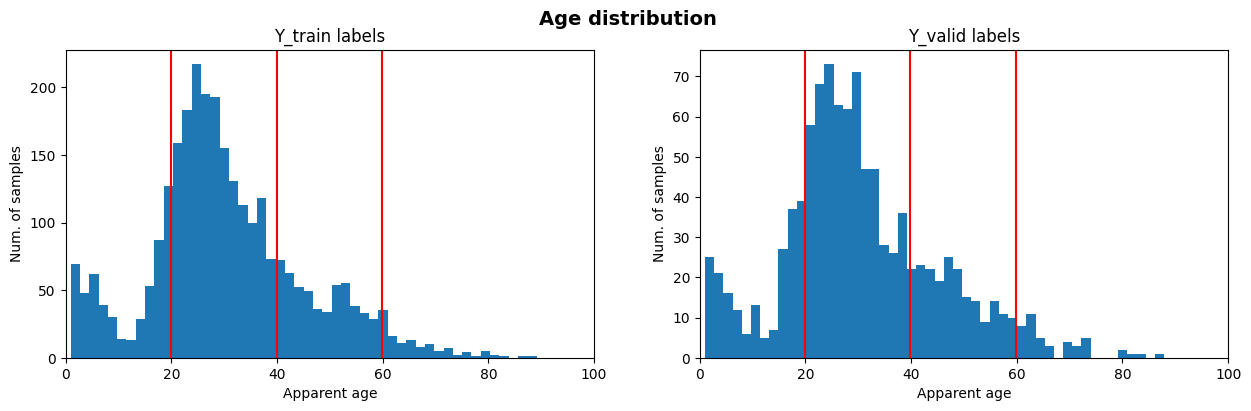

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle('Age distribution', fontsize=14, fontweight='bold')

# labels are multiplied by 100 to show the original values
ax1.hist(Y_train*100, bins = 50)
ax1.axvline(x=tr_group_1.max()*100, color='r', label='axvline - full height')
ax1.axvline(x=tr_group_2.max()*100, color='r', label='axvline - full height')
ax1.axvline(x=tr_group_3.max()*100, color='r', label='axvline - full height')
#ax1.axvline(x=tr_group_4.mean()*100, color='r', label='axvline - full height')

ax1.set_title('Y_train labels')
ax1.set(xlabel='Apparent age', ylabel='Num. of samples')
ax1.set_xlim([0, 100])

ax2.hist(Y_valid*100, bins = 50)
ax2.axvline(x=val_group_1.max()*100, color='r', label='axvline - full height')
ax2.axvline(x=val_group_2.max()*100, color='r', label='axvline - full height')
ax2.axvline(x=val_group_3.max()*100, color='r', label='axvline - full height')
#ax2.axvline(x=val_group_4.mean()*100, color='r', label='axvline - full height')

ax2.set_title('Y_valid labels')
ax2.set(xlabel='Apparent age', ylabel='Num. of samples')
ax2.set_xlim([0, 100])

In [ ]:
# Define age bins
age_bins = [0, 20, 40, 60]

# Use numpy's digitize function to assign each sample to a group
group_indices = np.digitize(Y_train * 100, age_bins)

# Create separate lists or arrays for each group
tr_group_1_indices = np.where(group_indices == 1)[0]
tr_group_2_indices = np.where(group_indices == 2)[0]
tr_group_3_indices = np.where(group_indices == 3)[0]
tr_group_4_indices = np.where(group_indices == 4)[0]

# Divide the datasets based on the group indices
tr_group_1_X = X_train[tr_group_1_indices]
tr_group_2_X = X_train[tr_group_2_indices]
tr_group_3_X = X_train[tr_group_3_indices]
tr_group_4_X = X_train[tr_group_4_indices]

tr_group_1_Y = Y_train[tr_group_1_indices]
tr_group_2_Y = Y_train[tr_group_2_indices]
tr_group_3_Y = Y_train[tr_group_3_indices]
tr_group_4_Y = Y_train[tr_group_4_indices]

tr_group_1_M = M_train[tr_group_1_indices]
tr_group_2_M = M_train[tr_group_2_indices]
tr_group_3_M = M_train[tr_group_3_indices]
tr_group_4_M = M_train[tr_group_4_indices]

In [ ]:
# Define age bins
age_bins = [0, 20, 40, 60]

# Use numpy's digitize function to assign each sample to a group
group_indices = np.digitize(Y_valid * 100, age_bins)

# Create separate lists or arrays for each group
valid_group_1_indices = np.where(group_indices == 1)[0]
valid_group_2_indices = np.where(group_indices == 2)[0]
valid_group_3_indices = np.where(group_indices == 3)[0]
valid_group_4_indices = np.where(group_indices == 4)[0]

# Divide the datasets based on the group indices
valid_group_1_X = X_valid[valid_group_1_indices]
valid_group_2_X = X_valid[valid_group_2_indices]
valid_group_3_X = X_valid[valid_group_3_indices]
valid_group_4_X = X_valid[valid_group_4_indices]

valid_group_1_Y = Y_valid[valid_group_1_indices]
valid_group_2_Y = Y_valid[valid_group_2_indices]
valid_group_3_Y = Y_valid[valid_group_3_indices]
valid_group_4_Y = Y_valid[valid_group_4_indices]

valid_group_1_M = M_valid[valid_group_1_indices]
valid_group_2_M = M_valid[valid_group_2_indices]
valid_group_3_M = M_valid[valid_group_3_indices]
valid_group_4_M = M_valid[valid_group_4_indices]


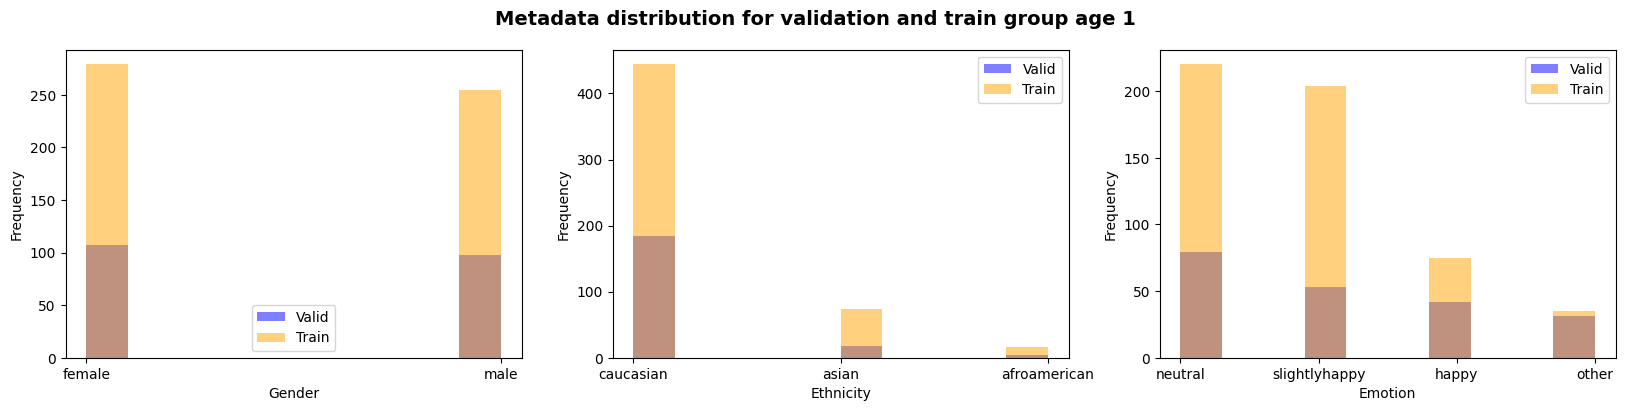

In [ ]:
# Extract data for valid_group_1
valid_gender = []
valid_ethnicity = []
valid_emotion = []
for sample in valid_group_1_M:
    valid_gender.append(sample[0])
    valid_ethnicity.append(sample[1])
    valid_emotion.append(sample[2])

# Extract data for train_group_1
train_gender = []
train_ethnicity = []
train_emotion = []
for sample in tr_group_1_M:
    train_gender.append(sample[0])
    train_ethnicity.append(sample[1])
    train_emotion.append(sample[2])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
fig.suptitle('Metadata distribution for validation and train group age 1', fontsize=14, fontweight='bold')

# Plot histograms for valid data
ax1.hist(valid_gender, color='blue', alpha=0.5, label='Valid')
ax2.hist(valid_ethnicity, color='blue', alpha=0.5, label='Valid')
ax3.hist(valid_emotion, color='blue', alpha=0.5, label='Valid')

# Plot histograms for train data
ax1.hist(train_gender, color='orange', alpha=0.5, label='Train')
ax2.hist(train_ethnicity, color='orange', alpha=0.5, label='Train')
ax3.hist(train_emotion, color='orange', alpha=0.5, label='Train')

# Set labels and legend
ax1.set_xlabel('Gender')
ax1.set_ylabel('Frequency')
ax2.set_xlabel('Ethnicity')
ax2.set_ylabel('Frequency')
ax3.set_xlabel('Emotion')
ax3.set_ylabel('Frequency')

ax1.legend()
ax2.legend()
ax3.legend()

plt.show()

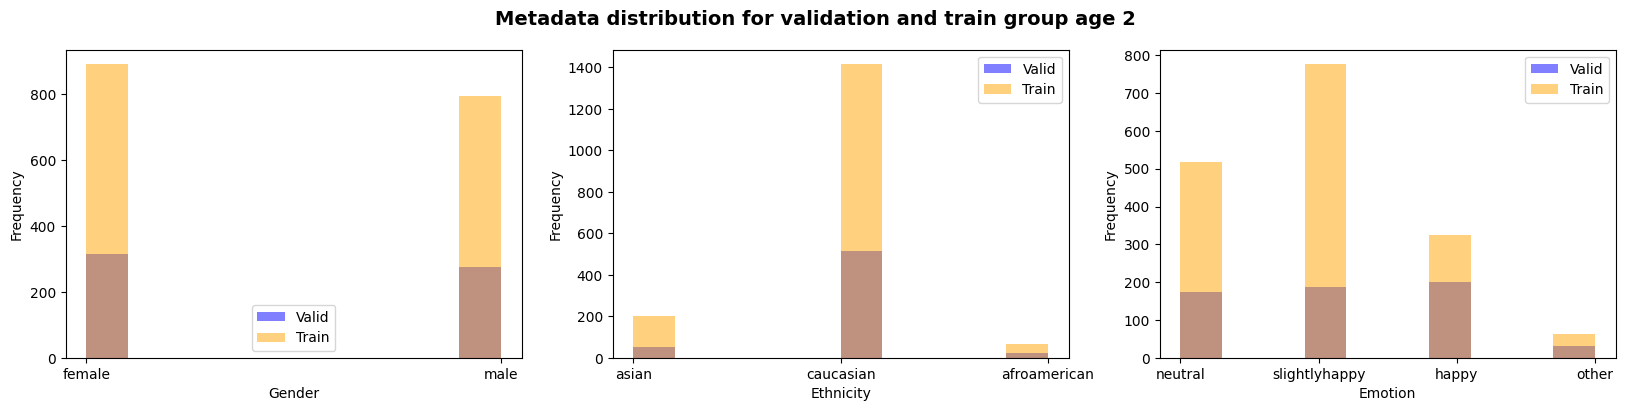

In [ ]:
# Extract data for valid_group_2
valid_gender = []
valid_ethnicity = []
valid_emotion = []
for sample in valid_group_2_M:
    valid_gender.append(sample[0])
    valid_ethnicity.append(sample[1])
    valid_emotion.append(sample[2])

# Extract data for train_group_2
train_gender = []
train_ethnicity = []
train_emotion = []
for sample in tr_group_2_M:
    train_gender.append(sample[0])
    train_ethnicity.append(sample[1])
    train_emotion.append(sample[2])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
fig.suptitle('Metadata distribution for validation and train group age 2', fontsize=14, fontweight='bold')

# Plot histograms for valid data
ax1.hist(valid_gender, color='blue', alpha=0.5, label='Valid')
ax2.hist(valid_ethnicity, color='blue', alpha=0.5, label='Valid')
ax3.hist(valid_emotion, color='blue', alpha=0.5, label='Valid')

# Plot histograms for train data
ax1.hist(train_gender, color='orange', alpha=0.5, label='Train')
ax2.hist(train_ethnicity, color='orange', alpha=0.5, label='Train')
ax3.hist(train_emotion, color='orange', alpha=0.5, label='Train')

# Set labels and legend
ax1.set_xlabel('Gender')
ax1.set_ylabel('Frequency')
ax2.set_xlabel('Ethnicity')
ax2.set_ylabel('Frequency')
ax3.set_xlabel('Emotion')
ax3.set_ylabel('Frequency')

ax1.legend()
ax2.legend()
ax3.legend()

plt.show()

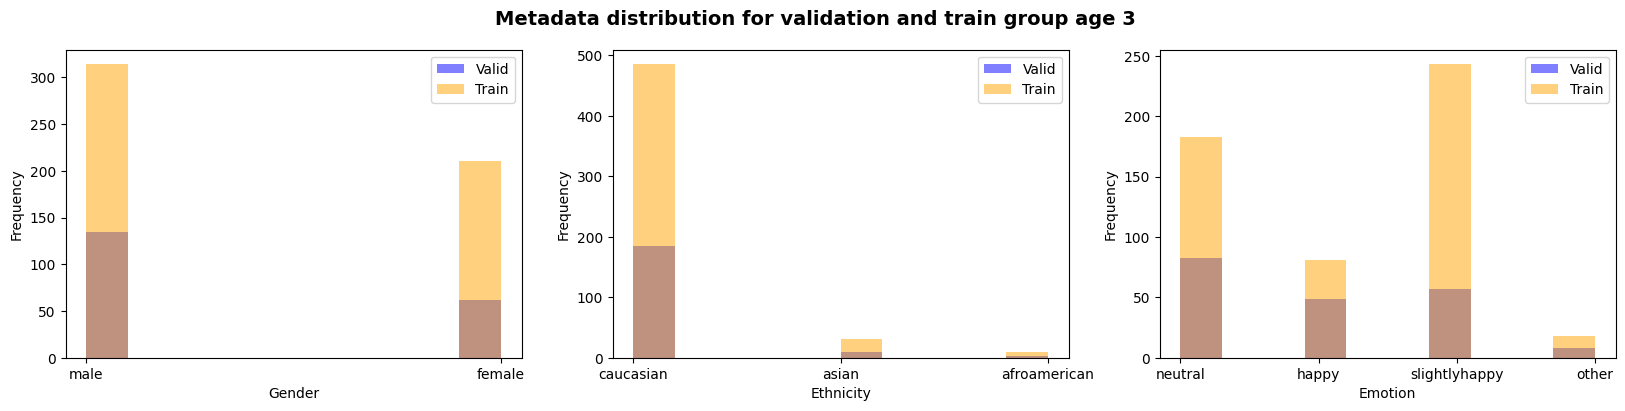

In [ ]:
# Extract data for valid_group_3
valid_gender = []
valid_ethnicity = []
valid_emotion = []
for sample in valid_group_3_M:
    valid_gender.append(sample[0])
    valid_ethnicity.append(sample[1])
    valid_emotion.append(sample[2])

# Extract data for train_group_3
train_gender = []
train_ethnicity = []
train_emotion = []
for sample in tr_group_3_M:
    train_gender.append(sample[0])
    train_ethnicity.append(sample[1])
    train_emotion.append(sample[2])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
fig.suptitle('Metadata distribution for validation and train group age 3', fontsize=14, fontweight='bold')

# Plot histograms for valid data
ax1.hist(valid_gender, color='blue', alpha=0.5, label='Valid')
ax2.hist(valid_ethnicity, color='blue', alpha=0.5, label='Valid')
ax3.hist(valid_emotion, color='blue', alpha=0.5, label='Valid')

# Plot histograms for train data
ax1.hist(train_gender, color='orange', alpha=0.5, label='Train')
ax2.hist(train_ethnicity, color='orange', alpha=0.5, label='Train')
ax3.hist(train_emotion, color='orange', alpha=0.5, label='Train')

# Set labels and legend
ax1.set_xlabel('Gender')
ax1.set_ylabel('Frequency')
ax2.set_xlabel('Ethnicity')
ax2.set_ylabel('Frequency')
ax3.set_xlabel('Emotion')
ax3.set_ylabel('Frequency')

ax1.legend()
ax2.legend()
ax3.legend()

plt.show()

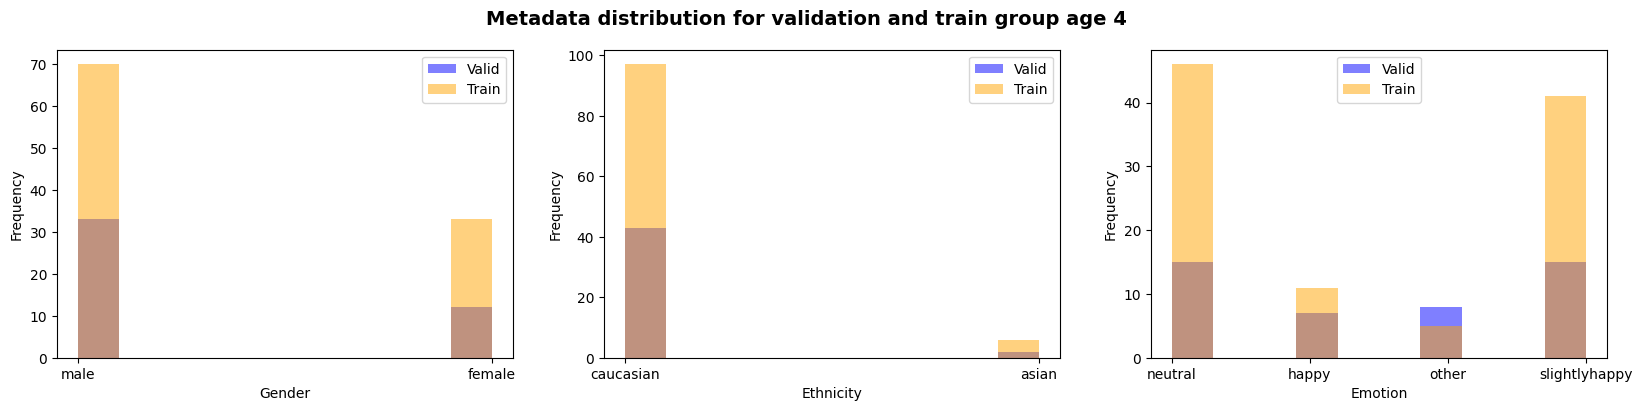

In [ ]:
# Extract data for valid_group_4
valid_gender = []
valid_ethnicity = []
valid_emotion = []
for sample in valid_group_4_M:
    valid_gender.append(sample[0])
    valid_ethnicity.append(sample[1])
    valid_emotion.append(sample[2])

# Extract data for train_group_4
train_gender = []
train_ethnicity = []
train_emotion = []
for sample in tr_group_4_M:
    train_gender.append(sample[0])
    train_ethnicity.append(sample[1])
    train_emotion.append(sample[2])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
fig.suptitle('Metadata distribution for validation and train group age 4', fontsize=14, fontweight='bold')

# Plot histograms for valid data
ax1.hist(valid_gender, color='blue', alpha=0.5, label='Valid')
ax2.hist(valid_ethnicity, color='blue', alpha=0.5, label='Valid')
ax3.hist(valid_emotion, color='blue', alpha=0.5, label='Valid')

# Plot histograms for train data
ax1.hist(train_gender, color='orange', alpha=0.5, label='Train')
ax2.hist(train_ethnicity, color='orange', alpha=0.5, label='Train')
ax3.hist(train_emotion, color='orange', alpha=0.5, label='Train')

# Set labels and legend
ax1.set_xlabel('Gender')
ax1.set_ylabel('Frequency')
ax2.set_xlabel('Ethnicity')
ax2.set_ylabel('Frequency')
ax3.set_xlabel('Emotion')
ax3.set_ylabel('Frequency')

ax1.legend()
ax2.legend()
ax3.legend()

plt.show()

# Data Preprocessing

In [ ]:
# preprocessing data

# train set
X_train = X_train.astype('float32')
for i in range(0,X_train.shape[0]):
  x = X_train[i,:,:,:]
  x = np.expand_dims(x, axis=0)
  X_train[i,] = tf.keras.applications.resnet50.preprocess_input(x)

# validation set
X_valid = X_valid.astype('float32')
for i in range(0,X_valid.shape[0]):
  x = X_valid[i,:,:,:]
  x = np.expand_dims(x, axis=0)
  X_valid[i,] = tf.keras.applications.resnet50.preprocess_input(x)

### Experimenting with data transformations

(224, 224, 3)


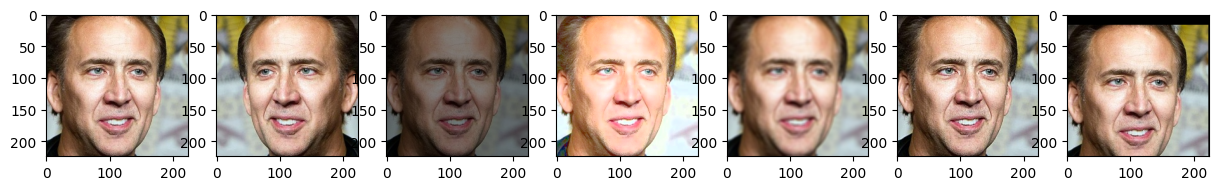

In [ ]:

# Randomly selecting a random image from train set
x = X_train[random.randint(0, len(X_train))]

# flip horizontaly
x_flipped = cv2.flip(x, 1)

# less brightness
x_brigth = cv2.cvtColor(x,cv2.COLOR_RGB2HSV)
x_brigth[:,:,2] = x_brigth[:,:,2]*.5+np.random.uniform()
x_brigth = cv2.cvtColor(x_brigth,cv2.COLOR_HSV2RGB)

# more brightness
value = 70
hsv = cv2.cvtColor(x, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
lim = 255 - value
v[v > lim] = 255
v[v <= lim] += value
final_hsv = cv2.merge((h, s, v))
x_mbrigth = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

# gaussian blur (here you can also play with the function parameters)
x_blur = cv2.GaussianBlur(x,(5,5),3.0)

# sharpen image
r = 0.3
x_sharp = (r + 1) * x - r * x_blur
x_sharp = np.maximum(x_sharp, np.zeros(x_sharp.shape))
x_sharp = np.minimum(x_sharp, 255. * np.ones(x_sharp.shape))
x_sharp = x_sharp.round().astype(np.uint8)

print(x_sharp.shape)


# translation (randomly translation from -25 to +25 in x and y)
rows, cols ,c= x.shape
M = np.float32([[1, 0, np.random.randint(-25, 25)], [0, 1, np.random.randint(-50, 50)]])
x_translate = cv2.warpAffine(x, M, (cols, rows))

# Visualizing the augmented data
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7, figsize=(15, 15))
ax1.imshow(cv2.cvtColor(x, cv2.COLOR_BGR2RGB)) # original image
ax2.imshow(cv2.cvtColor(x_flipped, cv2.COLOR_BGR2RGB)) # flip horizontaly
ax3.imshow(cv2.cvtColor(x_brigth, cv2.COLOR_BGR2RGB)) # less brightness
ax4.imshow(cv2.cvtColor(x_mbrigth, cv2.COLOR_BGR2RGB)) # more brightness
ax5.imshow(cv2.cvtColor(x_blur, cv2.COLOR_BGR2RGB)) # gaussian blur
ax6.imshow(cv2.cvtColor(x_sharp, cv2.COLOR_BGR2RGB)) # sharpen
ax7.imshow(cv2.cvtColor(x_translate, cv2.COLOR_BGR2RGB)) # translation

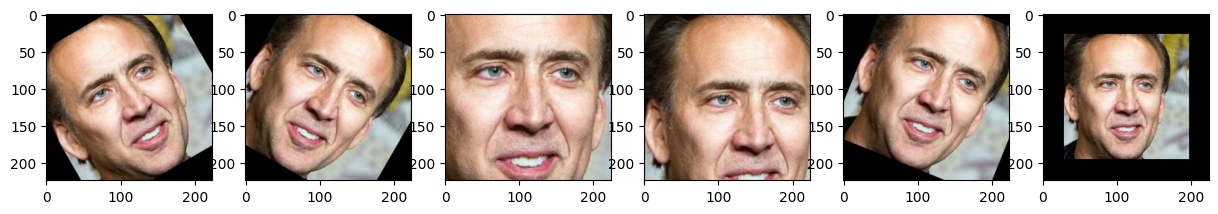

In [ ]:
def rotate_zoom(img, zoom=1, angle=0, coord=None):

    cy, cx = [ i/2 for i in img.shape[:-1] ] if coord is None else coord[::-1]

    rot_mat = cv2.getRotationMatrix2D((cx,cy), angle, zoom)
    result = cv2.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv2.INTER_LINEAR)

    return result

# rotate
x_rotate = rotate_zoom(x, angle=30)
x_rotate2 = rotate_zoom(x, angle=-30)

# random rotate
corners = [(50,50), (50,150), (150,50), (150,150)]
corner = corners[np.random.randint(4)]
angle = np.random.randint(20, 45) * np.random.randint(-1, 2)
x_random_rotate = rotate_zoom(x, angle=angle, coord=corner)

# zoom
x_central_zoom = rotate_zoom(x, 1.5)

# away zoom
x_away_zoom = rotate_zoom(x, 0.75)

# random zoom
cor = x.shape[0]
corners = [(0,0), (0,cor), (cor,0), (cor,cor)]
corner = corners[np.random.randint(4)]
x_random_zoom = rotate_zoom(x, 1.3, coord=corner)

# Visualizing the augmented data
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(15, 15))
ax1.imshow(cv2.cvtColor(x_rotate, cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(x_rotate2, cv2.COLOR_BGR2RGB))
ax3.imshow(cv2.cvtColor(x_central_zoom, cv2.COLOR_BGR2RGB))
ax4.imshow(cv2.cvtColor(x_random_zoom, cv2.COLOR_BGR2RGB))
ax5.imshow(cv2.cvtColor(x_random_rotate, cv2.COLOR_BGR2RGB))
ax6.imshow(cv2.cvtColor(x_away_zoom, cv2.COLOR_BGR2RGB))

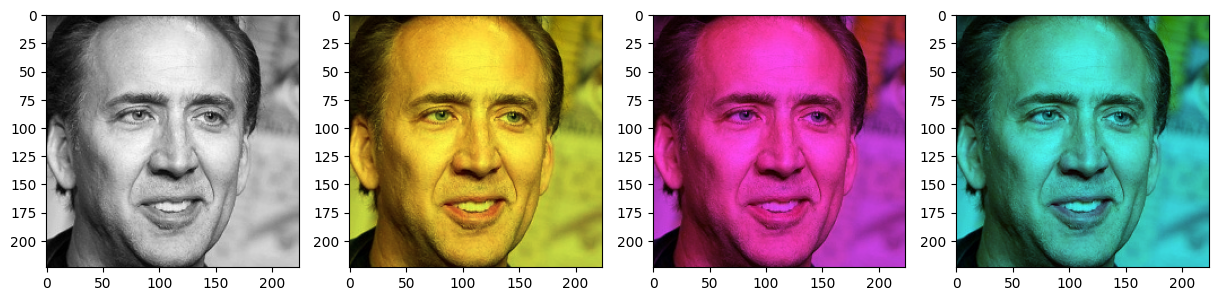

In [ ]:
# to grayscale
x_gray = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
x_gr = cv2.cvtColor(x_gray, cv2.COLOR_GRAY2RGB)

# color saturation
x_r, x_g, x_b = x.copy(), x.copy(), x.copy()
x_r[:,:,0] = x_r[:,:,0]*.3+np.random.uniform()
x_g[:,:,1] = x_g[:,:,1]*.3+np.random.uniform()
x_b[:,:,2] = x_b[:,:,2]*.3+np.random.uniform()

# Visualizing the augmented data
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 15))
ax1.imshow(cv2.cvtColor(x_gr, cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(x_r, cv2.COLOR_BGR2RGB))
ax3.imshow(cv2.cvtColor(x_g, cv2.COLOR_BGR2RGB))
ax4.imshow(cv2.cvtColor(x_b, cv2.COLOR_BGR2RGB))

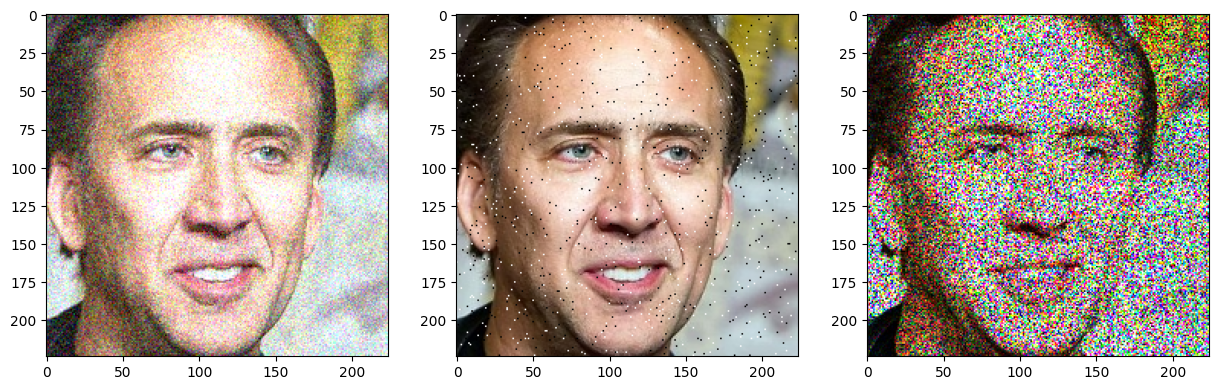

In [ ]:
def normalize(x):
    x = np.maximum(x, np.zeros(x.shape))
    x = np.minimum(x, 255. * np.ones(x.shape))
    x = x.round().astype(np.uint8)
    return x

# gaussian noise
gauss = np.random.normal(30, 30, x.shape)
x_gauss = x + gauss
x_gauss = normalize(x_gauss)

# salt and peper
x_sp = x.copy()
num_salt, num_pepper = 500, 500
coords_x = np.random.randint(0, x.shape[0], num_salt)
coords_y = np.random.randint(0, x.shape[1], num_salt)
for i in range(num_salt):
    x_sp[coords_x[i],coords_y[i],:] = 255
coords_x = np.random.randint(0, x.shape[0], num_pepper)
coords_y = np.random.randint(0, x.shape[1], num_pepper)
for i in range(num_pepper):
    x_sp[coords_x[i],coords_y[i],:] = 0

# poisson noise     # it's not working
vals = len(np.unique(x)) * 200000
vals = 2 ** np.ceil(np.log2(vals))
x_poisson = np.random.poisson(x * vals) / float(vals)
x_poisson = normalize(x_poisson)

# speckle noise
row,col,ch = x.shape
gauss = np.random.randn(row,col,ch)
gauss = gauss.reshape(row,col,ch)
x_speckle = x + x * gauss
x_speckle = normalize(x_speckle)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 15))
ax1.imshow(cv2.cvtColor(x_gauss, cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(x_sp, cv2.COLOR_BGR2RGB))
ax3.imshow(cv2.cvtColor(x_speckle, cv2.COLOR_BGR2RGB))

### Defining functions for data transformation

In [ ]:
# Functions to transform the image

def flip(x):
    return cv2.flip(x, 1)

def gaussian_blur(x):
    return cv2.GaussianBlur(x,(5,5),3.0)

def sharpen(x):
    r = 0.3
    x_blur = cv2.GaussianBlur(x,(5,5),3.0)
    x_sharp = (r + 1) * x - r * x_blur
    x_sharp = np.maximum(x_sharp, np.zeros(x_sharp.shape))
    x_sharp = np.minimum(x_sharp, 255. * np.ones(x_sharp.shape))
    x_sharp = x_sharp.round().astype(np.uint8)
    return x_sharp

def less_brightness(x):
    x_brigth = cv2.cvtColor(x,cv2.COLOR_RGB2HSV)
    x_brigth[:,:,2] = x_brigth[:,:,2]*.5+np.random.uniform()
    x_brigth = cv2.cvtColor(x_brigth,cv2.COLOR_HSV2RGB)
    return x_brigth

def more_brightness(x):
    value = 70
    hsv = cv2.cvtColor(x, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value
    final_hsv = cv2.merge((h, s, v))
    x_mbrigth = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return x_mbrigth

def translation(x):
    rows, cols ,c= x.shape
    M = np.float32([[1, 0, np.random.randint(-25, 25)], [0, 1, np.random.randint(-50, 50)]])
    x_translate = cv2.warpAffine(x, M, (cols, rows))
    return x_translate

In [ ]:
# size transformations

def rotate_zoom(img, zoom=1, angle=0, coord=None):
    # get the center of the opertation
    cy, cx = [ i/2 for i in img.shape[:-1] ] if coord is None else coord[::-1]
    # get matrix and apply it
    rot_mat = cv2.getRotationMatrix2D((cx,cy), angle, zoom)
    result = cv2.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

def rotate_right(x):
    return rotate_zoom(x, angle=20)

def rotate_left(x):
    return rotate_zoom(x, angle=-20)

def random_rotate(x):
    corners = [(50,50), (50,150), (150,50), (150,150)]
    corner = corners[np.random.randint(4)]
    angle = np.random.randint(10, 30) * np.random.randint(-1, 2)
    x_random_rotate = rotate_zoom(x, angle=angle, coord=corner)
    return x_random_rotate

def zoom(x):
    return rotate_zoom(x, 1.5)

def away_zoom(x):
    return rotate_zoom(x, 0.75)

def random_zoom(x):
    cor = x.shape[0]
    corners = [(0,0), (0,cor), (cor,0), (cor,cor)]
    corner = corners[np.random.randint(4)]
    return rotate_zoom(x, 1.3, coord=corner)

In [ ]:
# color transformations
def to_grayscale(x):
    x_gray = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    x_gr = cv2.cvtColor(x_gray, cv2.COLOR_GRAY2RGB)
    return x_gr

def color(x):
    color = np.random.randint(3)
    x_color = x.copy()
    x_color[:,:,color] = x_color[:,:,color]*.3+np.random.uniform()
    return x_color

In [ ]:
# noise transformations
def normalize(x):
    x = np.maximum(x, np.zeros(x.shape))
    x = np.minimum(x, 255. * np.ones(x.shape))
    x = x.round().astype(np.uint8)
    return x

def gaussian_noise(x):
    gauss = np.random.normal(30, 30, x.shape)
    x_gauss = x + gauss
    x_gauss = normalize(x_gauss)
    return x_gauss

def salt_n_peper(x):
    x_sp = x.copy()
    num_salt, num_pepper = 500, 500
    coords_x = np.random.randint(0, x.shape[0], num_salt)
    coords_y = np.random.randint(0, x.shape[1], num_salt)
    for i in range(num_salt):
        x_sp[coords_x[i],coords_y[i],:] = 255
    coords_x = np.random.randint(0, x.shape[0], num_pepper)
    coords_y = np.random.randint(0, x.shape[1], num_pepper)
    for i in range(num_pepper):
        x_sp[coords_x[i],coords_y[i],:] = 0
    return x_sp

def speckle(x):
    row,col,ch = x.shape
    gauss = np.random.randn(row,col,ch)
    gauss = gauss.reshape(row,col,ch)
    x_speckle = x + x * gauss
    x_speckle = normalize(x_speckle)
    return x_speckle

In [ ]:
# Function to decide which transformations are to be applied to the image

def rand_transform(img):
    # roll a dice for each transformation
    x = img.copy()

    # flip or not
    if np.random.randint(2):
        x = flip(x)

    # blur or sharpen
    r = np.random.randint(3)
    if r == 0:
        x = gaussian_blur(x)
    elif r == 1:
        x = sharpen(x)
    else:
        pass

    # color modifications
    r = np.random.randint(50)
    if r < 10:
        x = less_brightness(x)
    elif r < 20:
        x = more_brightness(x)
    elif r < 25:
        x = to_grayscale(x)
    elif r < 27:
        x = color(x)
    else:
        pass

    # position modifications (rotation, zoom, translocate)
    r = np.random.randint(100)
    if r < 10:
        x = rotate_left(x)
    elif r < 20:
        x = rotate_right(x)
    elif r < 30:
        x = zoom(x)
    elif r < 40:
        x = random_zoom(x)
    elif r < 50:
        x = random_rotate(x)
    elif r < 60:
        x = away_zoom(x)
    elif r < 70:
        x = translation(x)
    else:
        pass

    # add noise
    r = np.random.randint(100)
    if r < 10: #20
        x = gaussian_noise(x)
    elif r < 20: #40
        x = salt_n_peper(x)
    elif r < 22: #45
        x = speckle(x)
    else:
        pass

    return x

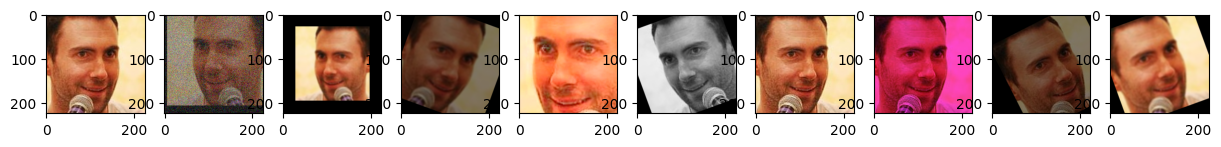

In [ ]:
# check how it works

n = 10

# Randomly selecting a random image from train set
img = X_train[np.random.randint(0, len(X_train))]

ax = tuple([] for _ in range(n))
fig, ax = plt.subplots(1, n, figsize=(15, 15))
for i in range(n):
    x = rand_transform(img)
    ax[i].imshow(cv2.cvtColor(x, cv2.COLOR_BGR2RGB))

## Data Augmentation

### Age only data augmentation

In [ ]:
# Looking more into the data

def age_da(X_train, Y_train, M_train):
  def gen_n(X, Y, M, n):
    X += [rand_transform(X_train[i]) for _ in range(n)]
    Y += [Y_train[i] for _ in range(n)]
    M += [M_train[i] for _ in range(n)]
    return X, Y, M

  X_new, Y_new, M_new = [], [], []
  for i in range(len(X_train)):
    if Y_train[i] < 0.05: n = 2
    elif Y_train[i] < 0.1: n = 4
    elif Y_train[i] < 0.15: n = 5
    elif Y_train[i] < 0.2: n = 1
    elif Y_train[i] < 0.3: n = 1
    elif Y_train[i] < 0.4: n = 1
    elif Y_train[i] < 0.5: n = 2
    elif Y_train[i] < 0.6: n = 3
    elif Y_train[i] < 0.7: n = 5
    elif Y_train[i] < 1.: n = 20
    else:
      n = 1
    X_new, Y_new, M_new = gen_n(X_new, Y_new, M_new, n)


  X_new, Y_new, M_new = np.array(X_new), np.array(Y_new), np.array(M_new)
  return X_new, Y_new, M_new

### Race and age data augmentation

In [ ]:
# Looking more into the data

def race_age_da(X_train, Y_train, M_train):
  def gen_n(X, Y, M, n):
    X += [rand_transform(X_train[i]) for _ in range(n)]
    Y += [Y_train[i] for _ in range(n)]
    M += [M_train[i] for _ in range(n)]
    return X, Y, M

  X_new, Y_new, M_new = [], [], []
  for i in range(len(X_train)):
    # age
    if Y_train[i] < 0.05: n = 2
    elif Y_train[i] < 0.1: n = 4
    elif Y_train[i] < 0.15: n = 5
    elif Y_train[i] < 0.2: n = 1
    elif Y_train[i] < 0.3: n = 1
    elif Y_train[i] < 0.4: n = 1
    elif Y_train[i] < 0.5: n = 2
    elif Y_train[i] < 0.6: n = 3
    elif Y_train[i] < 0.7: n = 5
    elif Y_train[i] < 1.: n = 20
    else: n = 1

    # race
    if M_train[i,1] == 'caucasian': n = math.ceil(n / 5)
    elif M_train[i,1] == 'asian': n *= 3
    elif M_train[i,1] == 'afroamerican': n *= 5

    X_new, Y_new, M_new = gen_n(X_new, Y_new, M_new, n)


  X_new, Y_new, M_new = np.array(X_new), np.array(Y_new), np.array(M_new)
  return X_new, Y_new, M_new

Compute bias after data augmentation

In [ ]:
def show_bias(M):
    gender = []
    etnhicity = []
    emotion = []
    for sample in M:
      gender.append(sample[0])
      etnhicity.append(sample[1])
      emotion.append(sample[2])

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
    fig.suptitle('Metadata distribution', fontsize=14, fontweight='bold')

    ax1.hist(gender)
    ax2.hist(etnhicity)
    ax3.hist(emotion)

# Model

In [ ]:
# loading the pretrained ResNet50 model
model = tf.keras.models.load_model('./model/weights.h5')

# print the model summary
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 base_input (InputLayer)     [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1/7x7_s2 (Conv2D)       (None, 112, 112, 64)         9408      ['base_input[0][0]']          
                                                                                                  
 conv1/7x7_s2/bn (BatchNorm  (None, 112, 112, 64)         256       ['conv1/7x7_s2[0][0]']        
 alization)                                                                                       
                                                                                                  
 activation_1 (Activation)   (None, 112, 112, 64)         0         ['conv1/7x7_s2/bn[0][0]'

In [ ]:
# building the last layers of the model

# Using the FC layer before the 'classifier_low_dim' layer as feature vector
fc_512 = model.get_layer('dim_proj').output

# adding a dropout layer to minimize overfiting problems
dp_layer = tf.keras.layers.Dropout(0.5)(fc_512)

# adding a few hidden FC layers to learn hidden representations
fc_128 = tf.keras.layers.Dense(128, activation='relu', name='f_128')(dp_layer) #leakyReLu instead of ReLu
fc_32 = tf.keras.layers.Dense(32, activation='relu', name='f_32')(fc_128) #leakyReLu instead of ReLu (tf.keras.layers.LeakyReLU(alpha=0.2))

# Includint an additional FC layer with sigmoid activation, used to regress
# the apparent age
output = tf.keras.layers.Dense(1, activation='sigmoid', name='predict')(fc_32) #cosine or sin (?)

# building and pringing the final model
model = tf.keras.models.Model(inputs=model.get_layer('base_input').output,outputs=output)

In [ ]:
def train(model, X_train, Y_train, X_valid, Y_valid, name):
  # training all layers (2nd stage), given the model saved on stage 1
  model.compile(tf.keras.optimizers.Adam(learning_rate=1e-5),loss=tf.keras.losses.MeanSquaredError(),metrics=['mae'])

  # defining the early stop criteria
  es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
  # saving the best model (2nd stage) based on val_loss with a different name
  mc = tf.keras.callbacks.ModelCheckpoint('/content/gdrive/Shareddrives/Computer_Vision/temp/best_model_'+str(name)+'.h5', monitor='val_loss', mode='min', save_best_only=True)

  history = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=16, epochs=30, shuffle=True, verbose=1, callbacks=[es,mc])

  # saving training history
  with open('/content/gdrive/Shareddrives/Computer_Vision/temp/train_history_'+str(name)+'.pkl', 'wb') as handle:
    pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Experiments

## Age+Race Data Augmentation

In [ ]:
# 1) Augmenting the data

# 2) Pre-processing the data

# 3) train with steage 2 model

# 4) test

In [ ]:
X_train, Y_train, M_train = race_age_da(X_train, Y_train, M_train)

(0.0, 100.0)

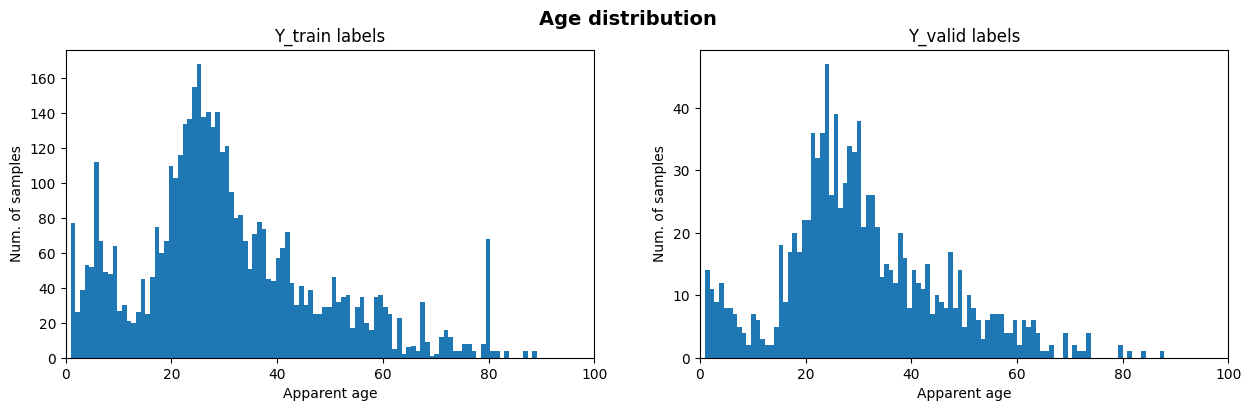

In [ ]:
# ploting new distribution of ages

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle('Age distribution', fontsize=14, fontweight='bold')

# labels are multiplied by 100 to show the original values
ax1.hist(Y_train*100, bins = 100)
ax1.set_title('Y_train labels')
ax1.set(xlabel='Apparent age', ylabel='Num. of samples')
ax1.set_xlim([0, 100])

ax2.hist(Y_valid*100, bins = 100)
ax2.set_title('Y_valid labels')
ax2.set(xlabel='Apparent age', ylabel='Num. of samples')
ax2.set_xlim([0, 100])

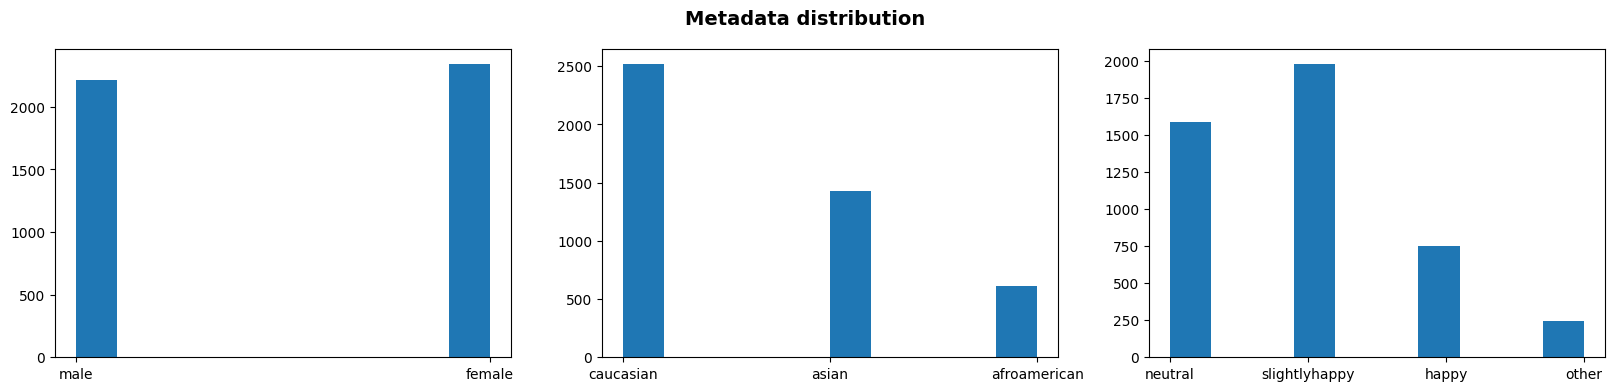

In [ ]:
# plot metadata distribution after naive data augmentation
show_bias(M_train)

See that asian and afroamericans have augmented

In [ ]:
# preprocessing data

# train set
X_train = X_train.astype('float32')
for i in range(0,X_train.shape[0]):
  x = X_train[i,:,:,:]
  x = np.expand_dims(x, axis=0)
  X_train[i,] = tf.keras.applications.resnet50.preprocess_input(x)

# validation set
X_valid = X_valid.astype('float32')
for i in range(0,X_valid.shape[0]):
  x = X_valid[i,:,:,:]
  x = np.expand_dims(x, axis=0)
  X_valid[i,] = tf.keras.applications.resnet50.preprocess_input(x)

### train

In [ ]:
# train with augmented data
model_naive = model
model_naive.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 base_input (InputLayer)     [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1/7x7_s2 (Conv2D)       (None, 112, 112, 64)         9408      ['base_input[0][0]']          
                                                                                                  
 conv1/7x7_s2/bn (BatchNorm  (None, 112, 112, 64)         256       ['conv1/7x7_s2[0][0]']        
 alization)                                                                                       
                                                                                                  
 activation_1 (Activation)   (None, 112, 112, 64)         0         ['conv1/7x7_s2/bn[0][0]'] 

In [ ]:
# setting all layers of the model to trainable
model_naive.trainable = True

counter = 0
for layer in model_naive.layers:
  #print(counter, layer.name, layer.trainable)
  counter +=1

In [ ]:
train(model_naive, X_train, Y_train, X_valid, Y_valid, 'race_age')

Epoch 1/30
285/285 [==============================] - ETA: 0s - loss: 0.3145 - mae: 0.3109

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


285/285 [==============================] - 101s 227ms/step - loss: 0.3145 - mae: 0.3109 - val_loss: 0.2709 - val_mae: 0.2737
Epoch 2/30
285/285 [==============================] - 65s 229ms/step - loss: 0.2768 - mae: 0.2736 - val_loss: 0.2637 - val_mae: 0.2657
Epoch 3/30
285/285 [==============================] - 69s 240ms/step - loss: 0.2678 - mae: 0.2627 - val_loss: 0.2551 - val_mae: 0.2511
Epoch 4/30
285/285 [==============================] - 61s 213ms/step - loss: 0.2631 - mae: 0.2559 - val_loss: 0.2469 - val_mae: 0.2362
Epoch 5/30
285/285 [==============================] - 62s 219ms/step - loss: 0.2553 - mae: 0.2424 - val_loss: 0.2319 - val_mae: 0.2039
Epoch 6/30
285/285 [==============================] - 77s 269ms/step - loss: 0.2389 - mae: 0.2123 - val_loss: 0.2118 - val_mae: 0.1541
Epoch 7/30
285/285 [==============================] - 85s 300ms/step - loss: 0.2252 - mae: 0.1839 - val_loss: 0.2040 - val_mae: 0.1333
Epoch 8/30
285/285 [==============================] - 86s 303ms/s

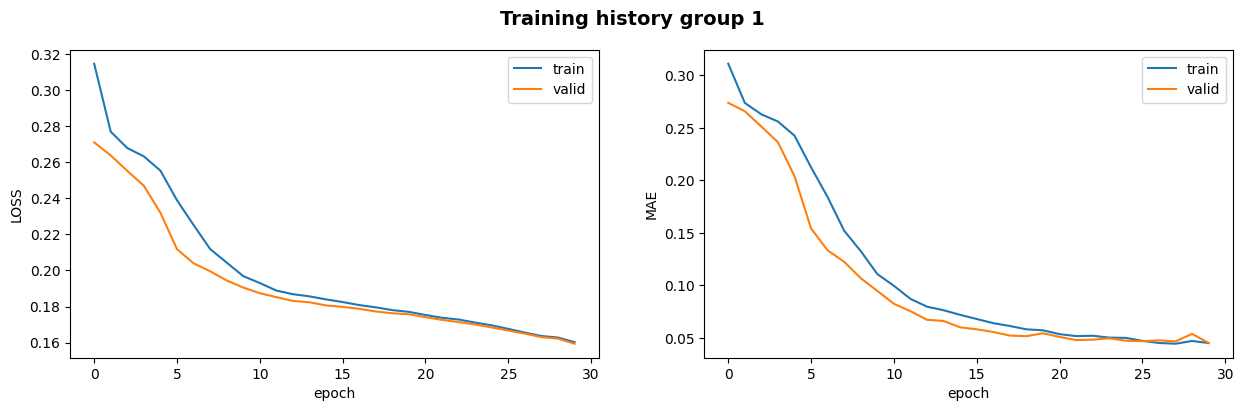

In [ ]:
from matplotlib import pyplot as plt

# here, it loads the history of the model we have already trained, or loads the
# history of the model you defined and trained
train_hist = pickle.load(open("/content/gdrive/Shareddrives/Computer_Vision/temp/train_history_race_age.pkl","rb"))

# we plot both, the LOSS and MAE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle('Training history group 1', fontsize=14, fontweight='bold')

ax1.plot(train_hist['loss'])
ax1.plot(train_hist['val_loss'])
ax1.set(xlabel='epoch', ylabel='LOSS')
ax1.legend(['train', 'valid'], loc='upper right')

ax2.plot(train_hist['mae'])
ax2.plot(train_hist['val_mae'])
ax2.set(xlabel='epoch', ylabel='MAE')
ax2.legend(['train', 'valid'], loc='upper right')

In [ ]:
# loading the saved model

saved_model = tf.keras.models.load_model('/content/gdrive/Shareddrives/Computer_Vision/temp/best_model_race_age.h5')


In [ ]:
# predict on the validation data
predictions_age_race_valid = saved_model.predict(X_valid, batch_size=32, verbose=1)

33/33 [==============================] - 184s 6s/step


In [ ]:
# evaluating on validation data (and re-scalling the predictions to the range of "ages")
error = []
for i in range(0,len(Y_valid)):
  error.append(abs(np.subtract(predictions_age_race_valid[i][0]*100,Y_valid[i]*100)))

print('MAE (model age_race, validation set) = %.8f' %(np.mean(error)))

# printing some predictions
print('-----')
for i in range(0,10):
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions_age_race_valid[i]*100, Y_valid[i]*100))

MAE (model age_race, validation set) = 4.52048375
-----
predicted age = 20.145 - Ground truth = 24.267
predicted age = 27.526 - Ground truth = 34.125
predicted age = 32.962 - Ground truth = 30.286
predicted age = 26.317 - Ground truth = 26.231
predicted age = 55.987 - Ground truth = 53.385
predicted age = 54.001 - Ground truth = 45.957
predicted age = 29.992 - Ground truth = 23.733
predicted age = 32.664 - Ground truth = 32.074
predicted age = 70.702 - Ground truth = 79.538
predicted age = 26.246 - Ground truth = 18.632


<ipython-input-25-bec1aaec86da>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions_age_race_valid[i]*100, Y_valid[i]*100))


In [ ]:
# compute  the biases

# importing the functions used to evaluate the different biases
from bias_functions import age_bias, gender_bias, ethnicity_bias, face_expression_bias

# computing the age bias (model_stage_2)
age_bias(predictions_age_race_valid,Y_valid*100)

# computing the gender bias (model_stage_2)
gender_bias(predictions_age_race_valid,Y_valid*100,M_valid)

# computing the ethnicity bias (model_stage_2)
ethnicity_bias(predictions_age_race_valid,Y_valid*100,M_valid)

# computing the face bias (model_stage_2)
face_expression_bias(predictions_age_race_valid,Y_valid*100,M_valid)

Age analysis:
Size group 1 = 205, MAE = 11.574986
Size group 2 = 590, MAE = 28.083166
Size group 3 = 197, MAE = 47.871750
Size group 4 = 45, MAE = 66.653633
---------
Age bias (Ba) =  30.837422688802082
Gender analysis:
Size group female = 497, MAE = 27.568563
Size group male = 540, MAE = 32.723171
---------
Gender bias (Bg) =  5.154608
Ethnicity Analysis:
Size group asian = 79, MAE = 26.938915
Size group afroamerican = 32, MAE = 28.091152
Size group caucasian = 926, MAE = 30.610147
---------
Ethnicity bias (Be) =  2.4474881490071616
Face experession Analysis:
Size group happy = 298, MAE = 29.786009
Size group slightlyhappy = 311, MAE = 30.739004
Size group neutral = 351, MAE = 31.051231
Size group other = 77, MAE = 26.455116
---------
Face Expression bias (Bf) =  2.456890106201172


### test

In [ ]:
del X_train, Y_train, M_train

In [ ]:
# loading the test data (with labels)
X_test = np.load('./data/data_test.npy')
Y_test = np.load('./data/labels_test.npy')

#=================================================================
# post-processing the test data with respect to ResNet-50 Inputs.
#=================================================================
# test set
X_test = X_test.astype('float32')
for i in range(0,X_test.shape[0]):
  x = X_test[i,:,:,:]
  x = np.expand_dims(x, axis=0)
  X_test[i,] = tf.keras.applications.resnet50.preprocess_input(x)

print('----')
print('Test data size and shape', X_test.shape)
print('Test labels size and shape', Y_test.shape)

----
Test data size and shape (1978, 224, 224, 3)
Test labels size and shape (1978,)


In [ ]:
# making predictions on the TEST data (and re-scalling the predictions to the range of "ages")
predictions_race_age = model_naive.predict(X_test, batch_size=32, verbose=1)*100

62/62 [==============================] - 8s 118ms/step


In [ ]:
# evaluating on test data
# note, the Y_test labels were not normalized, so they don't need to be re-scaled back
error = []
for i in range(0,len(Y_test)):
  error.append(abs(np.subtract(predictions_race_age[i][0],Y_test[i])))

print('MAE (model leaky relu, TEST set) = %.8f' %(np.mean(error)))

# printing some predictions
print('-----')
for i in range(0,10):
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions_race_age[i], Y_test[i]))

MAE (model leaky relu, TEST set) = 4.81560282
-----
predicted age = 23.497 - Ground truth = 23.205
predicted age = 57.001 - Ground truth = 70.737
predicted age = 38.696 - Ground truth = 55.368
predicted age = 28.219 - Ground truth = 24.278
predicted age = 33.902 - Ground truth = 25.231
predicted age = 38.923 - Ground truth = 35.179
predicted age = 21.355 - Ground truth = 26.923
predicted age = 41.262 - Ground truth = 48.189
predicted age = 21.116 - Ground truth = 18.676
predicted age = 44.490 - Ground truth = 57.378


<ipython-input-39-ed3e5fa0e960>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions_race_age[i], Y_test[i]))


In [ ]:
import csv

# saving the predictions as a csv file
with open('content/gdrive/Shareddrives/Computer_Vision/predictions/predictions.csv', 'w') as csvFile:
  writer = csv.writer(csvFile)
  writer.writerows(predictions_race_age) # change name!!
csvFile.close()

# compressing the csv file (to be submitted to codalab as prediction)
! zip predictions_age_race.zip predictions.csv

FileNotFoundError: [Errno 2] No such file or directory: './predictions/predictions.csv'

## Age + Race Data Augmentation + 4 specific models for age



1.   Load data
2.   Divide between the 4 groups
3.   Augment the data for the different groups separatly
4.   Preprocess the data for ResNet50 imput
4.   Finetune 4 different models (one x age group)
5.   Compute the weighted probablity of age



In [ ]:
# 1) Load data


### group 1

In [ ]:
# 3) augment + transform data
# group 1
X_train, Y_train, M_train = race_age_da(tr_group_1_X, tr_group_1_Y, tr_group_1_M)

In [ ]:
print('Size dataset before Data Augmentation:' , len(tr_group_1_X), '\n'
      'Size dataset after Data Augmentation:', len(X_train))

Size dataset before Data Augmentation: 534 
Size dataset after Data Augmentation: 1094


(0.0, 100.0)

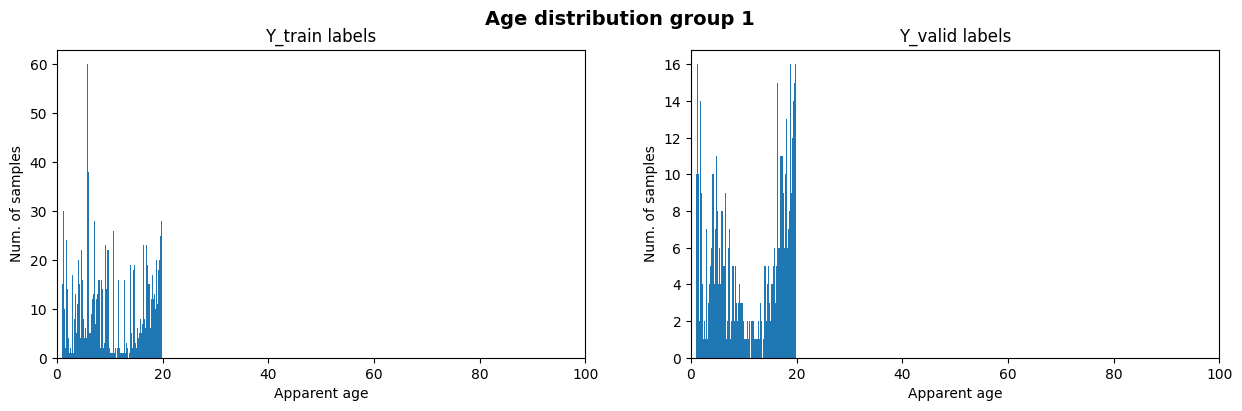

In [ ]:
# ploting new distribution of ages

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle('Age distribution group 1', fontsize=14, fontweight='bold')

# labels are multiplied by 100 to show the original values
ax1.hist(Y_train*100, bins = 100)
ax1.set_title('Y_train labels')
ax1.set(xlabel='Apparent age', ylabel='Num. of samples')
ax1.set_xlim([0, 100])

ax2.hist(tr_group_1_Y*100, bins = 100)
ax2.set_title('Y_valid labels')
ax2.set(xlabel='Apparent age', ylabel='Num. of samples')
ax2.set_xlim([0, 100])

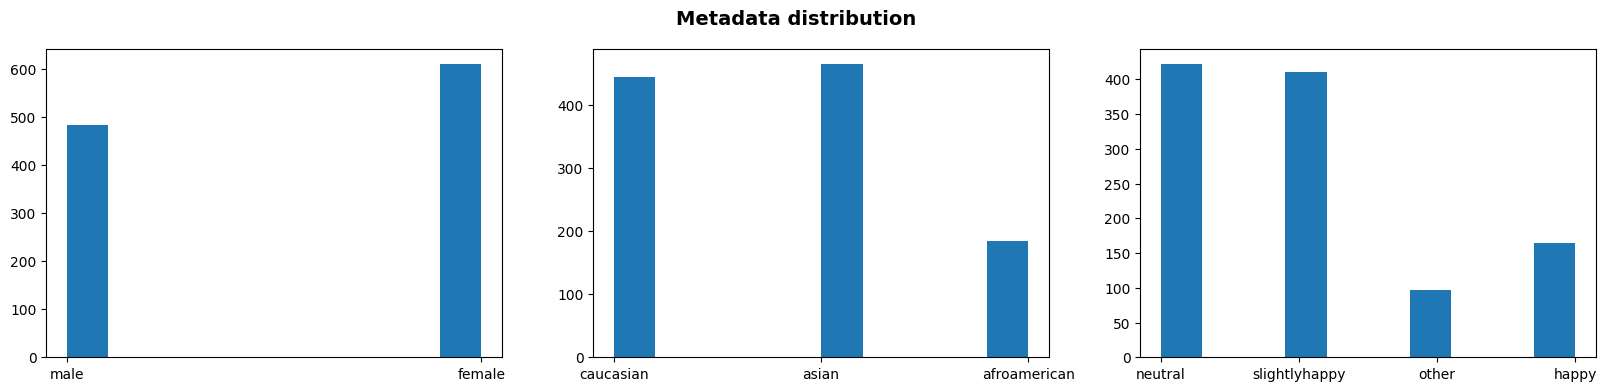

In [ ]:
# plot metadata distribution after naive data augmentation
show_bias(M_train)

In [ ]:
# preprocessing data

# train set
X_train = X_train.astype('float32')
for i in range(0,X_train.shape[0]):
  x = X_train[i,:,:,:]
  x = np.expand_dims(x, axis=0)
  X_train[i,] = tf.keras.applications.resnet50.preprocess_input(x)

# validation set
X_valid = X_valid.astype('float32')
for i in range(0,X_valid.shape[0]):
  x = X_valid[i,:,:,:]
  x = np.expand_dims(x, axis=0)
  X_valid[i,] = tf.keras.applications.resnet50.preprocess_input(x)

### train

In [ ]:
model_g1 = model
model_g1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 base_input (InputLayer)     [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1/7x7_s2 (Conv2D)       (None, 112, 112, 64)         9408      ['base_input[0][0]']          
                                                                                                  
 conv1/7x7_s2/bn (BatchNorm  (None, 112, 112, 64)         256       ['conv1/7x7_s2[0][0]']        
 alization)                                                                                       
                                                                                                  
 activation_1 (Activation)   (None, 112, 112, 64)         0         ['conv1/7x7_s2/bn[0][0]'] 

In [ ]:
# setting all layers of the model to trainable
model_g1.trainable = True

counter = 0
for layer in model_g1.layers:
  #print(counter, layer.name, layer.trainable)
  counter +=1

In [ ]:
train(model_g1, X_train, Y_train, valid_group_1_X, valid_group_1_Y, 'race_age_g1')

Epoch 1/30
69/69 [==============================] - ETA: 0s - loss: 0.5643 - mae: 0.4908

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


69/69 [==============================] - 78s 420ms/step - loss: 0.5643 - mae: 0.4908 - val_loss: 0.2408 - val_mae: 0.1613
Epoch 2/30
69/69 [==============================] - 15s 220ms/step - loss: 0.3262 - mae: 0.2469 - val_loss: 0.1990 - val_mae: 0.1187
Epoch 3/30
69/69 [==============================] - 13s 194ms/step - loss: 0.2231 - mae: 0.1352 - val_loss: 0.1965 - val_mae: 0.1164
Epoch 4/30
69/69 [==============================] - 14s 205ms/step - loss: 0.2117 - mae: 0.1238 - val_loss: 0.1965 - val_mae: 0.1169
Epoch 5/30
69/69 [==============================] - 12s 181ms/step - loss: 0.2026 - mae: 0.1145 - val_loss: 0.1965 - val_mae: 0.1169
Epoch 6/30
69/69 [==============================] - 14s 201ms/step - loss: 0.2005 - mae: 0.1121 - val_loss: 0.1965 - val_mae: 0.1169
Epoch 7/30
69/69 [==============================] - 13s 188ms/step - loss: 0.1991 - mae: 0.1102 - val_loss: 0.1965 - val_mae: 0.1170
Epoch 8/30
69/69 [==============================] - 13s 190ms/step - loss: 0.195

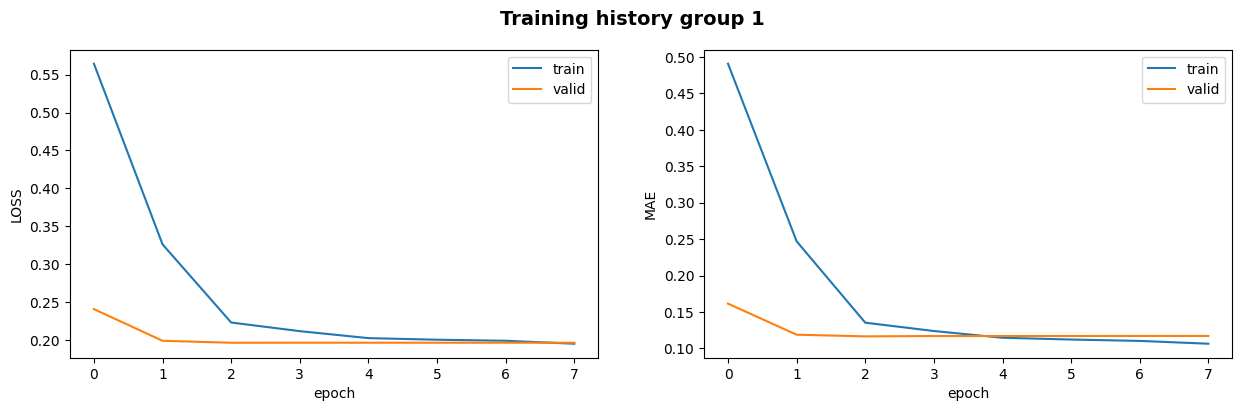

In [ ]:
# here, it loads the history of the model we have already trained, or loads the
# history of the model you defined and trained
train_hist = pickle.load(open("/content/gdrive/Shareddrives/Computer_Vision/temp/train_history_race_age_g1.pkl","rb"))

# we plot both, the LOSS and MAE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle('Training history group 1', fontsize=14, fontweight='bold')

ax1.plot(train_hist['loss'])
ax1.plot(train_hist['val_loss'])
ax1.set(xlabel='epoch', ylabel='LOSS')
ax1.legend(['train', 'valid'], loc='upper right')

ax2.plot(train_hist['mae'])
ax2.plot(train_hist['val_mae'])
ax2.set(xlabel='epoch', ylabel='MAE')
ax2.legend(['train', 'valid'], loc='upper right')

In [ ]:
# predict on the validation data
predictions_age_race_valid = model_g1.predict(valid_group_1_X, batch_size=32, verbose=1)

7/7 [==============================] - 3s 66ms/step


In [ ]:
# evaluating on validation data (and re-scalling the predictions to the range of "ages")
error = []
for i in range(0,len(valid_group_1_Y)):
  error.append(abs(np.subtract(predictions_age_race_valid[i][0]*100,valid_group_1_Y[i]*100)))

print('MAE (model age_race, validation set) = %.8f' %(np.mean(error)))

# printing some predictions
print('-----')
for i in range(0,10):
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions_age_race_valid[i]*100, valid_group_1_Y[i]*100))

MAE (model age_race, validation set) = 11.69992486
-----
predicted age = 0.000 - Ground truth = 18.632
predicted age = 0.008 - Ground truth = 17.486
predicted age = 0.001 - Ground truth = 18.071
predicted age = 0.001 - Ground truth = 19.952
predicted age = 0.000 - Ground truth = 17.538
predicted age = 0.000 - Ground truth = 6.000
predicted age = 0.000 - Ground truth = 19.145
predicted age = 0.000 - Ground truth = 3.789
predicted age = 0.000 - Ground truth = 18.833
predicted age = 0.000 - Ground truth = 3.842


<ipython-input-36-708704dc2c65>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions_age_race_valid[i]*100, valid_group_1_Y[i]*100))


In [ ]:
del X_train, Y_train, M_train

### group 2

In [ ]:
# 3) augment + transform data
# group 2
X_train, Y_train, M_train = race_age_da(tr_group_2_X, tr_group_2_Y, tr_group_2_M)

In [ ]:
print('Size dataset before Data Augmentation:' , len(tr_group_2_X), '\n'
      'Size dataset after Data Augmentation:', len(X_train))

Size dataset before Data Augmentation: 1683 
Size dataset after Data Augmentation: 2349


(0.0, 100.0)

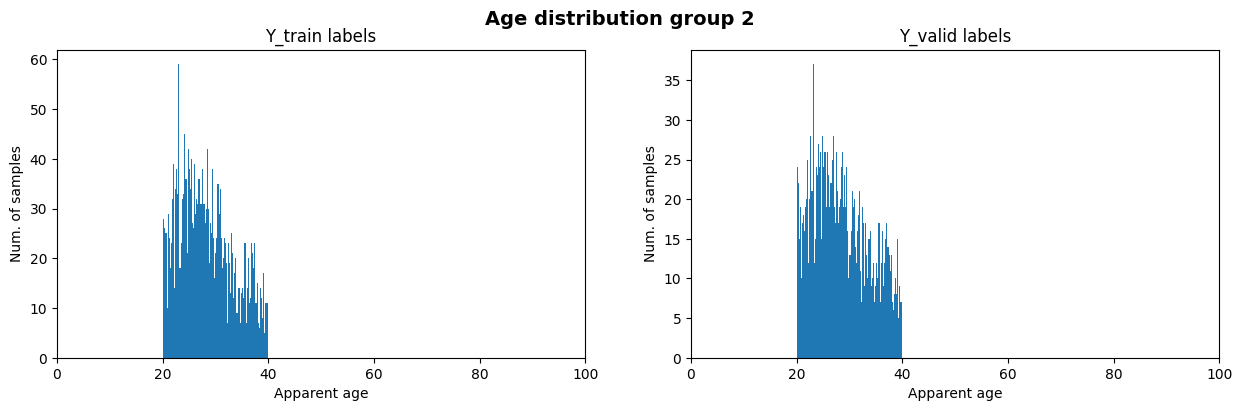

In [ ]:
# ploting new distribution of ages

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle('Age distribution group 2', fontsize=14, fontweight='bold')

# labels are multiplied by 100 to show the original values
ax1.hist(Y_train*100, bins = 100)
ax1.set_title('Y_train labels')
ax1.set(xlabel='Apparent age', ylabel='Num. of samples')
ax1.set_xlim([0, 100])

ax2.hist(tr_group_2_Y*100, bins = 100)
ax2.set_title('Y_valid labels')
ax2.set(xlabel='Apparent age', ylabel='Num. of samples')
ax2.set_xlim([0, 100])

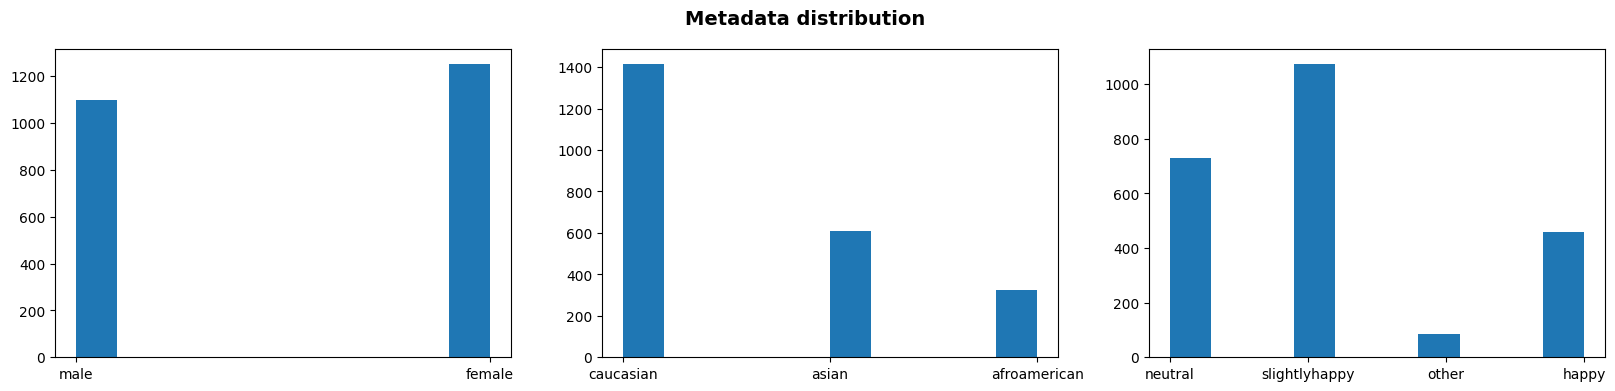

In [ ]:
# plot metadata distribution after naive data augmentation
show_bias(M_train)

In [ ]:
# preprocessing data

# train set
X_train = X_train.astype('float32')
for i in range(0,X_train.shape[0]):
  x = X_train[i,:,:,:]
  x = np.expand_dims(x, axis=0)
  X_train[i,] = tf.keras.applications.resnet50.preprocess_input(x)

# validation set
X_valid = X_valid.astype('float32')
for i in range(0,X_valid.shape[0]):
  x = X_valid[i,:,:,:]
  x = np.expand_dims(x, axis=0)
  X_valid[i,] = tf.keras.applications.resnet50.preprocess_input(x)

In [ ]:
model_g2 = model
model_g2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 base_input (InputLayer)     [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1/7x7_s2 (Conv2D)       (None, 112, 112, 64)         9408      ['base_input[0][0]']          
                                                                                                  
 conv1/7x7_s2/bn (BatchNorm  (None, 112, 112, 64)         256       ['conv1/7x7_s2[0][0]']        
 alization)                                                                                       
                                                                                                  
 activation_1 (Activation)   (None, 112, 112, 64)         0         ['conv1/7x7_s2/bn[0][0]'] 

In [ ]:
# setting all layers of the model to trainable
model_g2.trainable = True

counter = 0
for layer in model_g2.layers:
  #print(counter, layer.name, layer.trainable)
  counter +=1

In [ ]:
train(model_g2, X_train, Y_train, valid_group_2_X, valid_group_2_Y, 'race_age_g2')

Epoch 1/30
147/147 [==============================] - ETA: 0s - loss: 0.3444 - mae: 0.3581 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


147/147 [==============================] - 1608s 11s/step - loss: 0.3444 - mae: 0.3581 - val_loss: 0.2627 - val_mae: 0.2832
Epoch 2/30
147/147 [==============================] - 1576s 11s/step - loss: 0.2739 - mae: 0.2911 - val_loss: 0.2613 - val_mae: 0.2824
Epoch 3/30
147/147 [==============================] - 1564s 11s/step - loss: 0.2646 - mae: 0.2835 - val_loss: 0.2616 - val_mae: 0.2832
Epoch 4/30
147/147 [==============================] - 1562s 11s/step - loss: 0.2631 - mae: 0.2829 - val_loss: 0.2616 - val_mae: 0.2834
Epoch 5/30
147/147 [==============================] - 1563s 11s/step - loss: 0.2627 - mae: 0.2828 - val_loss: 0.2615 - val_mae: 0.2835
Epoch 6/30
147/147 [==============================] - 1543s 11s/step - loss: 0.2622 - mae: 0.2829 - val_loss: 0.2616 - val_mae: 0.2837
Epoch 7/30
147/147 [==============================] - 1543s 11s/step - loss: 0.2622 - mae: 0.2830 - val_loss: 0.2615 - val_mae: 0.2837
Epoch 7: early stopping


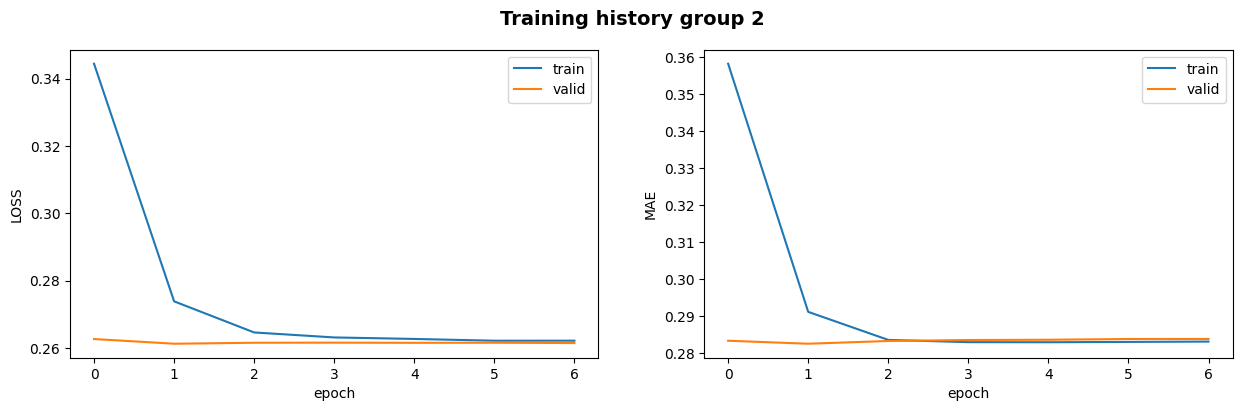

In [ ]:
# here, it loads the history of the model we have already trained, or loads the
# history of the model you defined and trained
train_hist = pickle.load(open("/content/gdrive/Shareddrives/Computer_Vision/temp/train_history_race_age_g2.pkl","rb"))

# we plot both, the LOSS and MAE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle('Training history group 2', fontsize=14, fontweight='bold')

ax1.plot(train_hist['loss'])
ax1.plot(train_hist['val_loss'])
ax1.set(xlabel='epoch', ylabel='LOSS')
ax1.legend(['train', 'valid'], loc='upper right')

ax2.plot(train_hist['mae'])
ax2.plot(train_hist['val_mae'])
ax2.set(xlabel='epoch', ylabel='MAE')
ax2.legend(['train', 'valid'], loc='upper right')

In [ ]:
# predict on the validation data
predictions_age_race_valid = model_g2.predict(valid_group_2_X, batch_size=32, verbose=1)

19/19 [==============================] - 85s 4s/step


In [ ]:
# evaluating on validation data (and re-scalling the predictions to the range of "ages")
error = []
for i in range(0,len(valid_group_2_Y)):
  error.append(abs(np.subtract(predictions_age_race_valid[i][0]*100,valid_group_2_Y[i]*100)))

print('MAE (model age_race, validation set) = %.8f' %(np.mean(error)))

# printing some predictions
print('-----')
for i in range(0,10):
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions_age_race_valid[i]*100, valid_group_2_Y[i]*100))

MAE (model age_race, validation set) = 28.37322748
-----
predicted age = 0.000 - Ground truth = 24.267
predicted age = 0.002 - Ground truth = 34.125
predicted age = 0.000 - Ground truth = 30.286
predicted age = 0.003 - Ground truth = 26.231
predicted age = 0.000 - Ground truth = 23.733
predicted age = 0.000 - Ground truth = 32.074
predicted age = 0.000 - Ground truth = 34.923
predicted age = 0.000 - Ground truth = 32.423
predicted age = 0.000 - Ground truth = 22.071
predicted age = 0.000 - Ground truth = 28.526


<ipython-input-43-5574ae1aa0a7>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions_age_race_valid[i]*100, valid_group_2_Y[i]*100))


In [ ]:
del X_train, Y_train, M_train

### group 3

In [ ]:
# 3) augment + transform data
# group 3
X_train, Y_train, M_train = race_age_da(tr_group_3_X, tr_group_3_Y, tr_group_3_M)

In [ ]:
print('Size dataset before Data Augmentation:' , len(tr_group_3_X), '\n'
      'Size dataset after Data Augmentation:', len(X_train))

Size dataset before Data Augmentation: 525 
Size dataset after Data Augmentation: 806


(0.0, 100.0)

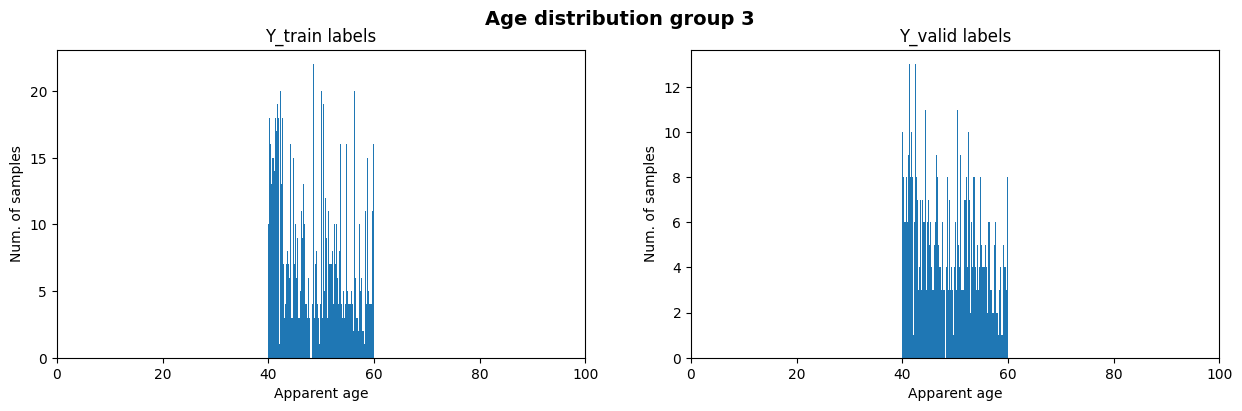

In [ ]:
# ploting new distribution of ages

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle('Age distribution group 3', fontsize=14, fontweight='bold')

# labels are multiplied by 100 to show the original values
ax1.hist(Y_train*100, bins = 100)
ax1.set_title('Y_train labels')
ax1.set(xlabel='Apparent age', ylabel='Num. of samples')
ax1.set_xlim([0, 100])

ax2.hist(tr_group_3_Y*100, bins = 100)
ax2.set_title('Y_valid labels')
ax2.set(xlabel='Apparent age', ylabel='Num. of samples')
ax2.set_xlim([0, 100])

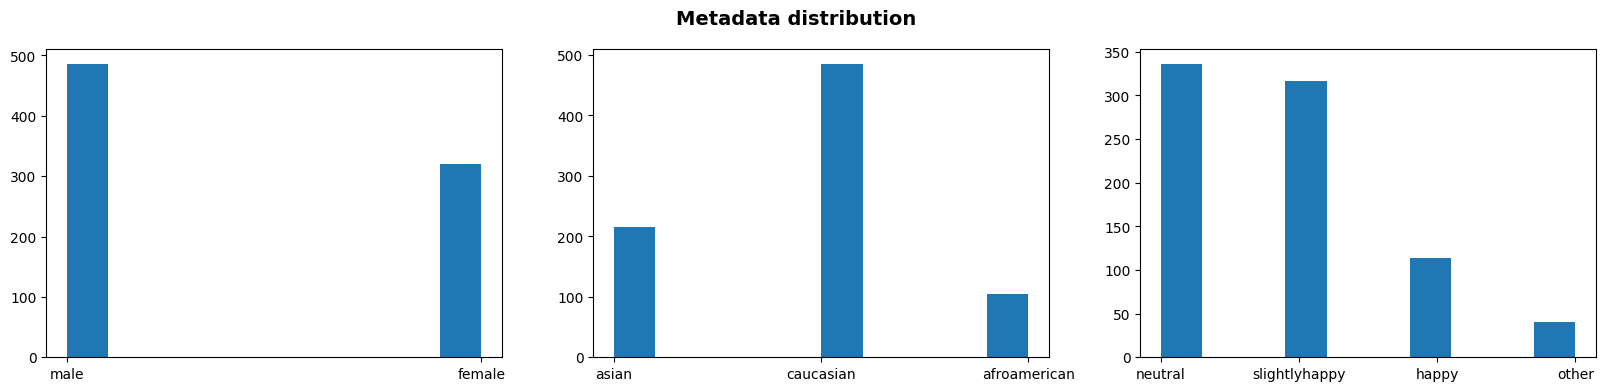

In [ ]:
# plot metadata distribution after naive data augmentation
show_bias(M_train)

In [ ]:
# preprocessing data

# train set
X_train = X_train.astype('float32')
for i in range(0,X_train.shape[0]):
  x = X_train[i,:,:,:]
  x = np.expand_dims(x, axis=0)
  X_train[i,] = tf.keras.applications.resnet50.preprocess_input(x)

# validation set
X_valid = X_valid.astype('float32')
for i in range(0,X_valid.shape[0]):
  x = X_valid[i,:,:,:]
  x = np.expand_dims(x, axis=0)
  X_valid[i,] = tf.keras.applications.resnet50.preprocess_input(x)

In [ ]:
model_g3 = model
model_g3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 base_input (InputLayer)     [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1/7x7_s2 (Conv2D)       (None, 112, 112, 64)         9408      ['base_input[0][0]']          
                                                                                                  
 conv1/7x7_s2/bn (BatchNorm  (None, 112, 112, 64)         256       ['conv1/7x7_s2[0][0]']        
 alization)                                                                                       
                                                                                                  
 activation_1 (Activation)   (None, 112, 112, 64)         0         ['conv1/7x7_s2/bn[0][0]'] 

In [ ]:
# setting all layers of the model to trainable
model_g3.trainable = True

counter = 0
for layer in model_g3.layers:
  #print(counter, layer.name, layer.trainable)
  counter +=1

In [ ]:
train(model_g3, X_train, Y_train, valid_group_3_X, valid_group_3_Y, 'race_age_g3')

Epoch 1/30
51/51 [==============================] - ETA: 0s - loss: 0.1977 - mae: 0.1101

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


51/51 [==============================] - 42s 337ms/step - loss: 0.1977 - mae: 0.1101 - val_loss: 0.1765 - val_mae: 0.0629
Epoch 2/30
51/51 [==============================] - 15s 291ms/step - loss: 0.1907 - mae: 0.0858 - val_loss: 0.1731 - val_mae: 0.0495
Epoch 3/30
51/51 [==============================] - 16s 322ms/step - loss: 0.1894 - mae: 0.0839 - val_loss: 0.1719 - val_mae: 0.0472
Epoch 4/30
51/51 [==============================] - 15s 292ms/step - loss: 0.1901 - mae: 0.0867 - val_loss: 0.1710 - val_mae: 0.0462
Epoch 5/30
51/51 [==============================] - 12s 231ms/step - loss: 0.1878 - mae: 0.0825 - val_loss: 0.1704 - val_mae: 0.0455
Epoch 6/30
51/51 [==============================] - 16s 325ms/step - loss: 0.1876 - mae: 0.0827 - val_loss: 0.1698 - val_mae: 0.0449
Epoch 7/30
51/51 [==============================] - 11s 217ms/step - loss: 0.1853 - mae: 0.0786 - val_loss: 0.1693 - val_mae: 0.0442
Epoch 8/30
51/51 [==============================] - 17s 328ms/step - loss: 0.183

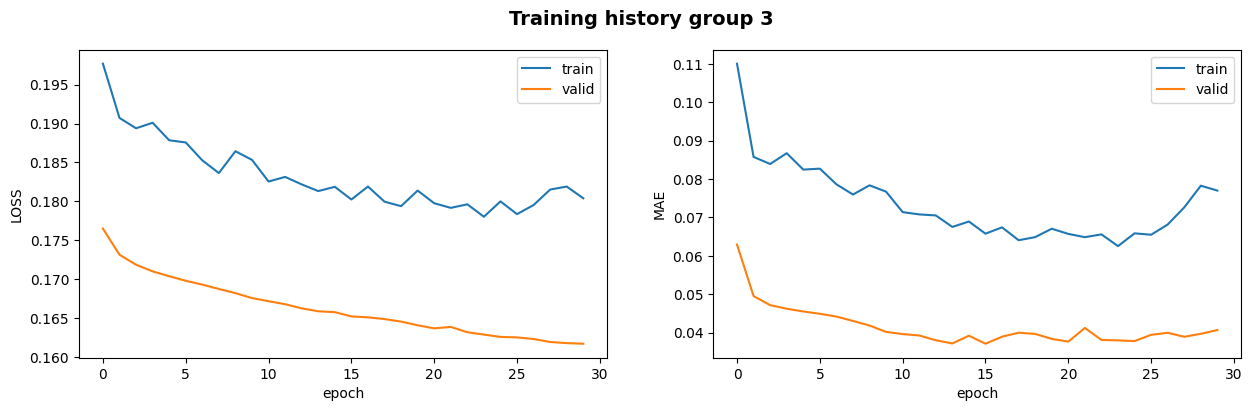

In [ ]:
# here, it loads the history of the model we have already trained, or loads the
# history of the model you defined and trained
train_hist = pickle.load(open("/content/gdrive/Shareddrives/Computer_Vision/temp/train_history_race_age_g3.pkl","rb"))

# we plot both, the LOSS and MAE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle('Training history group 3', fontsize=14, fontweight='bold')

ax1.plot(train_hist['loss'])
ax1.plot(train_hist['val_loss'])
ax1.set(xlabel='epoch', ylabel='LOSS')
ax1.legend(['train', 'valid'], loc='upper right')

ax2.plot(train_hist['mae'])
ax2.plot(train_hist['val_mae'])
ax2.set(xlabel='epoch', ylabel='MAE')
ax2.legend(['train', 'valid'], loc='upper right')

In [ ]:
# predict on the validation data
predictions_age_race_valid = model_g3.predict(valid_group_3_X, batch_size=32, verbose=1)

7/7 [==============================] - 2s 88ms/step


In [ ]:
# evaluating on validation data (and re-scalling the predictions to the range of "ages")
error = []
for i in range(0,len(valid_group_3_Y)):
  error.append(abs(np.subtract(predictions_age_race_valid[i][0]*100,valid_group_3_Y[i]*100)))

print('MAE (model age_race, validation set) = %.8f' %(np.mean(error)))

# printing some predictions
print('-----')
for i in range(0,10):
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions_age_race_valid[i]*100, valid_group_3_Y[i]*100))

MAE (model age_race, validation set) = 4.06672940
-----
predicted age = 47.849 - Ground truth = 53.385
predicted age = 48.015 - Ground truth = 45.957
predicted age = 50.229 - Ground truth = 48.143
predicted age = 46.366 - Ground truth = 47.071
predicted age = 45.538 - Ground truth = 49.261
predicted age = 48.850 - Ground truth = 52.467
predicted age = 48.106 - Ground truth = 47.357
predicted age = 47.512 - Ground truth = 49.917
predicted age = 47.595 - Ground truth = 42.960
predicted age = 46.923 - Ground truth = 46.053


<ipython-input-62-cbffa4cbbb1f>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions_age_race_valid[i]*100, valid_group_3_Y[i]*100))


In [ ]:
del X_train, Y_train, M_train

In [ ]:
# compute also the biases

### group 4

In [ ]:
# 3) augment + transform data
# group 4
X_train, Y_train, M_train = race_age_da(tr_group_4_X, tr_group_4_Y, tr_group_4_M)

In [ ]:
print('Size dataset before Data Augmentation:' , len(tr_group_4_X), '\n'
      'Size dataset after Data Augmentation:', len(X_train))

Size dataset before Data Augmentation: 103 
Size dataset after Data Augmentation: 310


(0.0, 100.0)

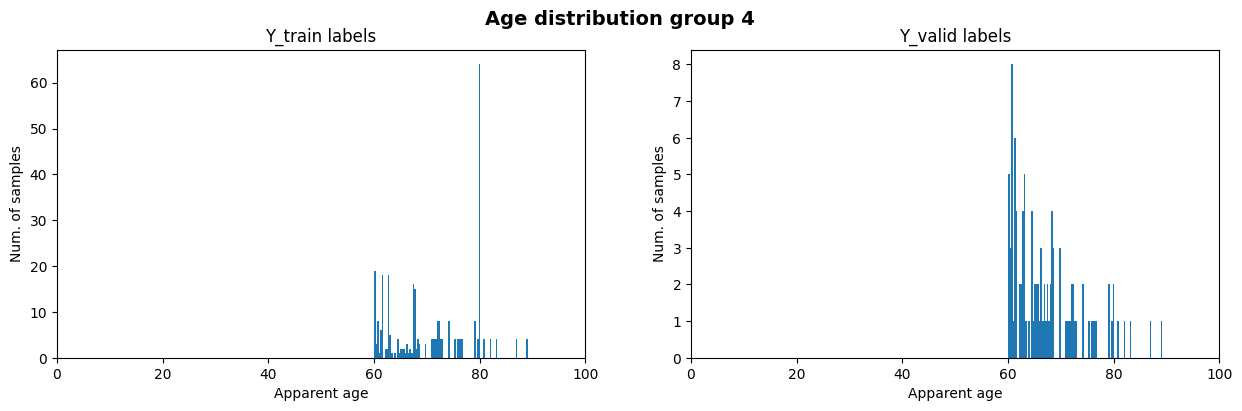

In [ ]:
# ploting new distribution of ages

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle('Age distribution group 4', fontsize=14, fontweight='bold')

# labels are multiplied by 100 to show the original values
ax1.hist(Y_train*100, bins = 100)
ax1.set_title('Y_train labels')
ax1.set(xlabel='Apparent age', ylabel='Num. of samples')
ax1.set_xlim([0, 100])

ax2.hist(tr_group_4_Y*100, bins = 100)
ax2.set_title('Y_valid labels')
ax2.set(xlabel='Apparent age', ylabel='Num. of samples')
ax2.set_xlim([0, 100])

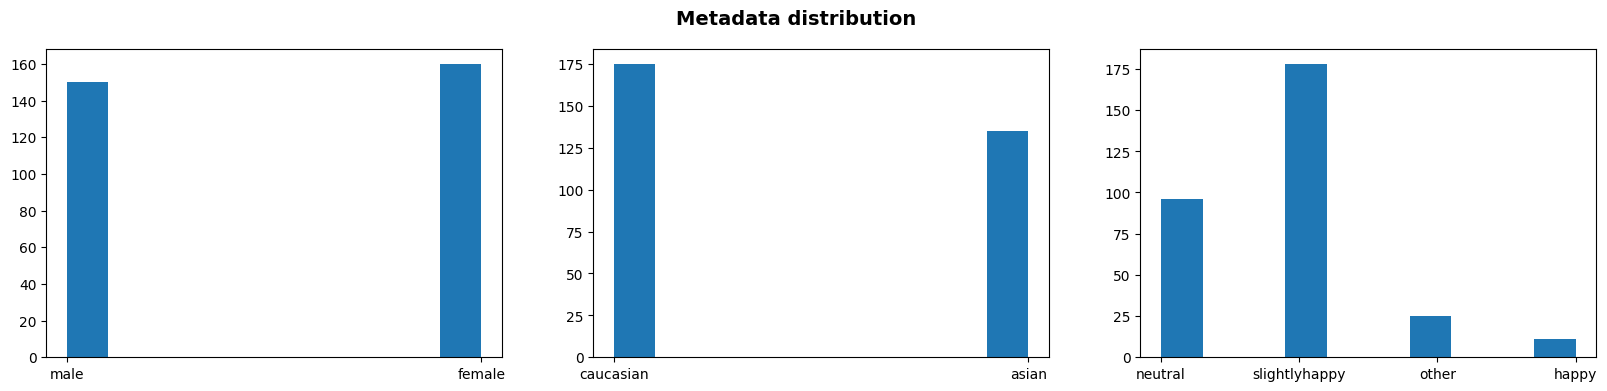

In [ ]:
# plot metadata distribution after naive data augmentation
show_bias(M_train)

In [ ]:
# preprocessing data

# train set
X_train = X_train.astype('float32')
for i in range(0,X_train.shape[0]):
  x = X_train[i,:,:,:]
  x = np.expand_dims(x, axis=0)
  X_train[i,] = tf.keras.applications.resnet50.preprocess_input(x)

# validation set
X_valid = X_valid.astype('float32')
for i in range(0,X_valid.shape[0]):
  x = X_valid[i,:,:,:]
  x = np.expand_dims(x, axis=0)
  X_valid[i,] = tf.keras.applications.resnet50.preprocess_input(x)

In [ ]:
model_g4 = model
model_g4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 base_input (InputLayer)     [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1/7x7_s2 (Conv2D)       (None, 112, 112, 64)         9408      ['base_input[0][0]']          
                                                                                                  
 conv1/7x7_s2/bn (BatchNorm  (None, 112, 112, 64)         256       ['conv1/7x7_s2[0][0]']        
 alization)                                                                                       
                                                                                                  
 activation_1 (Activation)   (None, 112, 112, 64)         0         ['conv1/7x7_s2/bn[0][0]'] 

In [ ]:
# setting all layers of the model to trainable
model_g4.trainable = True

counter = 0
for layer in model_g4.layers:
  #print(counter, layer.name, layer.trainable)
  counter +=1

In [ ]:
train(model_g4, X_train, Y_train, valid_group_2_X, valid_group_2_Y, 'race_age_g4')

Epoch 1/30
20/20 [==============================] - ETA: 0s - loss: 0.1729 - mae: 0.0810

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


20/20 [==============================] - 38s 591ms/step - loss: 0.1729 - mae: 0.0810 - val_loss: 0.2130 - val_mae: 0.2237
Epoch 2/30
20/20 [==============================] - 6s 299ms/step - loss: 0.1709 - mae: 0.0758 - val_loss: 0.2155 - val_mae: 0.2294
Epoch 3/30
20/20 [==============================] - 5s 255ms/step - loss: 0.1719 - mae: 0.0761 - val_loss: 0.2210 - val_mae: 0.2409
Epoch 4/30
20/20 [==============================] - 6s 303ms/step - loss: 0.1726 - mae: 0.0737 - val_loss: 0.2255 - val_mae: 0.2501
Epoch 5/30
20/20 [==============================] - 6s 305ms/step - loss: 0.1713 - mae: 0.0775 - val_loss: 0.2255 - val_mae: 0.2504
Epoch 6/30
20/20 [==============================] - 5s 256ms/step - loss: 0.1682 - mae: 0.0686 - val_loss: 0.2261 - val_mae: 0.2521
Epoch 6: early stopping


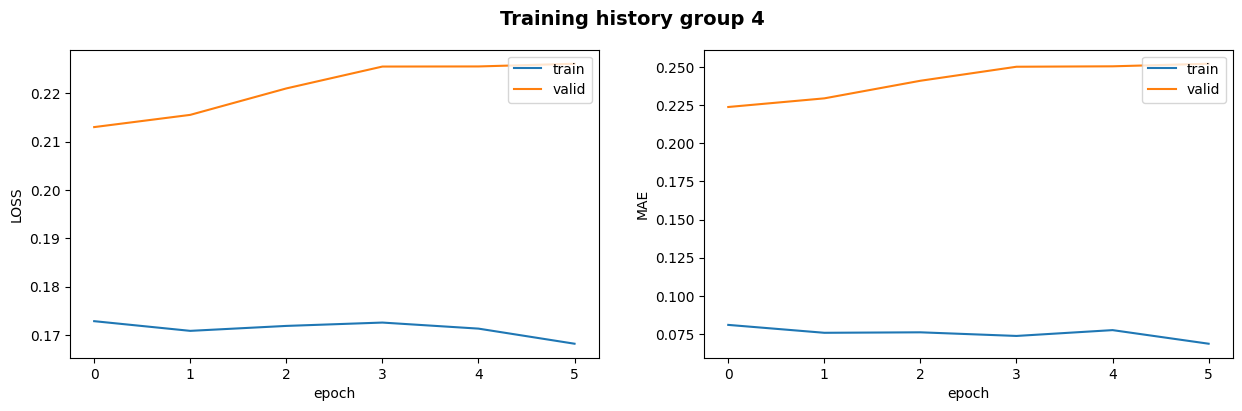

In [ ]:
# here, it loads the history of the model we have already trained, or loads the
# history of the model you defined and trained
train_hist = pickle.load(open("/content/gdrive/Shareddrives/Computer_Vision/temp/train_history_race_age_g4.pkl","rb"))

# we plot both, the LOSS and MAE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle('Training history group 4', fontsize=14, fontweight='bold')

ax1.plot(train_hist['loss'])
ax1.plot(train_hist['val_loss'])
ax1.set(xlabel='epoch', ylabel='LOSS')
ax1.legend(['train', 'valid'], loc='upper right')

ax2.plot(train_hist['mae'])
ax2.plot(train_hist['val_mae'])
ax2.set(xlabel='epoch', ylabel='MAE')
ax2.legend(['train', 'valid'], loc='upper right')

In [ ]:
# predict on the validation data
predictions_age_race_valid = model_g4.predict(valid_group_4_X, batch_size=32, verbose=1)

2/2 [==============================] - 1s 106ms/step


In [ ]:
# evaluating on validation data (and re-scalling the predictions to the range of "ages")
error = []
for i in range(0,len(valid_group_4_Y)):
  error.append(abs(np.subtract(predictions_age_race_valid[i][0]*100,valid_group_4_Y[i]*100)))

print('MAE (model age_race, validation set) = %.8f' %(np.mean(error)))

# printing some predictions
print('-----')
for i in range(0,10):
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions_age_race_valid[i]*100, valid_group_4_Y[i]*100))

MAE (model age_race, validation set) = 6.77279080
-----
predicted age = 68.622 - Ground truth = 79.538
predicted age = 58.156 - Ground truth = 67.000
predicted age = 67.429 - Ground truth = 68.769
predicted age = 58.313 - Ground truth = 60.447
predicted age = 69.769 - Ground truth = 73.385
predicted age = 58.217 - Ground truth = 61.214
predicted age = 60.980 - Ground truth = 63.154
predicted age = 62.720 - Ground truth = 60.805
predicted age = 70.273 - Ground truth = 87.875
predicted age = 74.989 - Ground truth = 65.514


<ipython-input-77-025cc43a6c69>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions_age_race_valid[i]*100, valid_group_4_Y[i]*100))


In [ ]:
del X_train, Y_train, M_train

### Stacking

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming you have predictions from base models stored in arrays
predictions_model1 = [...]  # Predictions from model 1
predictions_model2 = [...]  # Predictions from model 2
predictions_model3 = [...]  # Predictions from model 3
predictions_model4 = [...]  # Predictions from model 4

# Stack predictions into a feature matrix
X = np.column_stack((predictions_model1, predictions_model2, predictions_model3, predictions_model4))

# Define true labels (ages)
y = [...]  # True ages corresponding to the predictions

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the meta-model (Random Forest Regressor as an example)
meta_model = RandomForestRegressor(n_estimators=100, random_state=42)
meta_model.fit(X_train, y_train)

# Make predictions using the meta-model
meta_predictions = meta_model.predict(X_test)

# Evaluate the performance of the meta-model (e.g., calculate MAE, MSE, etc.)
